<a href="https://colab.research.google.com/github/youseon-jang/python/blob/main/Pandas_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 시작하기
- 고수준의 자료구조와 파이썬에서 빠르고 쉽게 사용할 수 있는 데이터 분석 도구 포함

In [ ]:
import pandas as pd

In [ ]:
from pandas import Series, DataFrame

## 1. Pandas 자료구조 소개
### **Series**
- Series : 일련의 객체를 담을 수 있는 1차원 배열 같은 구조


In [ ]:
s = pd.Series([4, 7, -5, 3])

s

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
s.values

array([ 4,  7, -5,  3])

In [ ]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
### 각각의 index 설정
s2 = pd.Series([4, 7, -5, 3], index = ['d', 'b', 'a', 'c'])
s2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
s2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
s2['a']

-5

In [ ]:
s2['d'] = 6

s2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

- ['c', 'a', 'd']는 색인의 배열로 해석됨
- 불리언 배열을 사용해서 값을 걸러내거가 산술 곱셈을 수행하거나 또는 수학 함수를 적용하는 등 NumPy 배열 연산을 수행해도 색인-값 연결이 유지됨

In [ ]:
s2[s2 > 0]

d    6
b    7
c    3
dtype: int64

In [ ]:
s2*2

d    12
b    14
a   -10
c     6
dtype: int64

In [ ]:
import numpy as np

np.exp(s2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

- Series 객체는 파이썬의 사전형을 인자로 받아야 하는 많은 함수에서 사전형을 대체하여 사용할 수 있음

In [ ]:
'b' in s2

True

In [ ]:
'e' in s2

False

- 파이썬 사전 객체로부터 Series 객체를 생성할 수 있음

In [ ]:
sdata = {'Ohio' : 35000, 'Texas' : 71000, 'Oregon' : 16000, 'Utah' : 5000}

s3 = pd.Series(sdata)

s3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

s4 = pd.Series(sdata, index = states)

s4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

- isnull
- notnull

In [ ]:
pd.isnull(s4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.notnull(s4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [ ]:
s4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

- Series는 산술 연산에서 색인과 라벨로 자동 정렬함

In [ ]:
s3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
s4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
s3 + s4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

- Series 객체와 색인 보두 name 속성 있음

In [ ]:
s4.name = 'population'

s4.index.name = 'state'

s4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

- Series의 색인은 대입하여 변경 가능함

In [ ]:
s

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
s.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

s

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### **DataFrame**
- DataFrame은 표 같은 스프레드시트 형식의 자료구조이고 여러 개의 컬럼이 있는데 각 컬럼은 서로 다른 종류의 값을 담을 수 있음
- 하나 이상의 2차원 배열에 저장됨

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]} 

In [ ]:
frame = pd.DataFrame(data)

frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
frame.head()  ### 5개만 출력

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [ ]:
pd.DataFrame(data, columns = ['year', 'state', 'pop'])  ## columns 순서 지정 가능

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [ ]:
frame2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'],
                      index = ['one', 'two', 'three', 'four', 'five', 'six'])

frame2  ### 사전에 없는 값을 넘기면 결측치로 지정됨

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

- DataFrame의 컬럼은 Series처럼 사전 형식의 표기법으로 접근하거나 속성 형식으로 접근할 수 있음

In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

- frame2[column] 형태는 어떤 칼럼이든 가능하지만 frame2.column 형태는 안될 때도 있으므로 전자 권장

- 로우는 위치나 loc 속성을 이용해 이름을 통한 접근 가능

In [ ]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

- columns 대입 가능
- 리스트나 배열을 column에 대입할 때는 대입하려는 값의 길이가 DataFrame의 크기와 동일해야 함

In [ ]:
frame2['debt'] = 16.5

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [ ]:
frame2['debt'] = np.arange(6.)

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])

frame2['debt'] = val

frame2  ### 존재하지 않는 색인에는 결측치 대입됨

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


- del, drop 예약어로 칼럼 삭제 가능
- 인덱싱으로 필요한 칼럼만 뽑은 후 저장하는 방법도 있음

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'

In [ ]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [ ]:
del frame2['eastern']

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

- DataFrame의 색인을 이용해서 얻은 컬럼은 내부 데이터에서 뷰(View)이며 복사가 이루어지지 않음
- 얻은 Series 객체에 대한 변경은 실제 DataFrame에 반영됨
- 복사본이 필요하면 copy 메서드 이용

In [ ]:
pop = {'Nevada' : {2001: 2.4, 2002: 2.9},
       'Ohio' : {2000: 1.5, 2001: 1.7, 2002: 3.6}}

pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
frame3 = pd.DataFrame(pop)

frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [ ]:
pd.DataFrame(pop, index = [2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [ ]:
pdata = {'Ohio' : frame3['Ohio'][:-1],
         'Nevada' : frame3['Nevada'][:2]}

pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


- dataframe의 색인과 컬럼에 name 속성을 지정했다면 함께 출력됨

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


- Series와 유사하게 value 속성은 DataFrame에 저장된 데이터를 2차원 배열로 반환함
- array로 반환됨

In [ ]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [ ]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### **색인 객체**
- pandas의 색인 객체는 표 형식의 데이터에서 각 로우와 컬럼에 대한 이름과 다른 메타데이터를 저장하는 객체임

In [ ]:
obj = Series(range(3), index = ['a', 'b', 'c'])

index = obj.index

index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

- index 한 개만 변경할 수 없음

In [ ]:
index[1] = 'd'

TypeError: ignored

In [ ]:
labels = pd.Index(np.arange(3))

labels

Int64Index([0, 1, 2], dtype='int64')

In [ ]:
obj2 = pd.Series([1.5, -2.5, 0], index = labels)

obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [ ]:
obj.index is labels

False

In [ ]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [ ]:
'Ohio' in frame3.columns

True

In [ ]:
2003 in frame3.index

False

- 파이썬의 집합과 달리 pandas의 인덱스는 중복되는 값을 허용함

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

## 2. 핵심 기능

### **재색인**
- reindex : 새로운 색인에 맞도록 객체를 새로 생성함

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index = ['d', 'b', 'a', 'c'])

obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

- 시계열 같은 순차적인 데이터를 재색인할 때 값을 보간하거나 채워 넣어야 할 경우가 있음
- method 옵션을 이용해서 채울 수 있음
- ffill(foward fill)같은 메서드 이용

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index = [0, 2, 4])

obj3

0      blue
2    purple
4    yellow
dtype: object

In [ ]:
obj3.reindex(range(6), method = 'ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

- DataFrame에 대한 reindex는 로우(색인), 컬럼 또는 둘 다 변경 가능함
- 순서만 전달하면 로우가 재색인됨

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index = ['a', 'c', 'd'],
                     columns = ['Ohio', 'Texas', 'California'])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [ ]:
states = ['Texas', 'Utah', 'California']

frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


- 재색인은 loc를 이용해서 라벨로 색인하면 좀 더 간결하게 할 수 있으며 대부분의 사용자는 명시적으로 이 방식을 선호함

In [ ]:
frame.loc[['a', 'b', 'c', 'd'], states]

KeyError: ignored

### **하나의 로우나 컬럼 삭제하기**
- drop

In [ ]:
import pandas as pd
import numpy as np

obj = pd.Series(np.arange(5), index = ['a', 'b', 'c', 'd', 'e'])

obj

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [ ]:
new_obj = obj.drop('c')

In [ ]:
new_obj

a    0
b    1
d    3
e    4
dtype: int64

In [ ]:
obj.drop(['d', 'c'])

a    0
b    1
e    4
dtype: int64

- DataFrame에서는 로우와 칼럼 모두에서 값을 삭제할 수 있음

In [ ]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


- drop 함수에 인자로 로우 이름 넘기면 해당 로우의 값을 모두 삭제
- axis = 1 or 0 인자를 꼭 넣기!!

In [ ]:
data.drop(['Colorado', 'Ohio'], axis = 0)

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop('two', axis = 1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['two', 'four'], axis = 'columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [ ]:
## drop 내용 저장할 때 inplace = True
obj.drop('c', inplace = True)

obj

a    0
b    1
d    3
e    4
dtype: int64

### **색인하기, 선택하기, 거르기**

In [ ]:
obj = pd.Series(np.arange(4.), index = ['a', 'b', 'c', 'd'])

obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [ ]:
obj['b']

1.0

In [ ]:
obj[1]

1.0

In [ ]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [ ]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [ ]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [ ]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

- 라벨 이름으로 슬라이싱하면 시작점과 끝점을 포함함

In [ ]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [ ]:
obj['b':'c'] = 5

obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

- 색인으로 DataFrame에서 하나 이상의 컬럼값을 가져올 수 있음

In [ ]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [ ]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


- 슬라이싱으로 로우를 선택하거나 불리언 배열로 선택할 수 있음

In [ ]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


- 스칼라 비교를 이용해 생성된 불리언 DataFrame을 사용해 값 선택

In [ ]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [ ]:
data[data < 5] = 0

data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


<loc과 iloc으로 선택하기>
- 축 이름 선택 시 loc
- 정수 색인으로 선택 시 iloc



In [ ]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [ ]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [ ]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [ ]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [ ]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### **정수 색인**
- label index가 0, 1, 2를 포함하는 경우 사용자가 label index로 값을 선택하려는 것인지 정수 색인으로 선택하려는 것인지 추측 어려움
- 정수 기반의 색인 사용시 모호함 사라짐

In [ ]:
ser = pd.Series(np.arange(3.))

ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
ser[-1]

KeyError: ignored

In [ ]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
ser2 = pd.Series(np.arange(3.), index = ['a', 'b', 'c'])

ser2[-1]

2.0

- 일관성 유지를 위해 정숫값을 담고 있는 축 색인이 있다면 우선적으로 라벨을 먼저 찾아보기
- 라벨 - loc / 정수색인 - iloc

In [ ]:
ser[:1]

0    0.0
dtype: float64

In [ ]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [ ]:
ser.iloc[:1]

0    0.0
dtype: float64

### **산술 연산과 데이터 정렬**

- 다른 색인을 갖고 있는 객체 간의 산술연산
- 객체를 더할 때 짝이 맞지 않는 색인이 있다면 결과에 두 색인이 통합된다.

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])

s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [ ]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])

s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [ ]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

- 서로 겹치는 색인이 없는 경우 데이터는 NA 값이 된다.
- 산술 연산 시 누락된 값은 전파된다.
- DataFrame의 경우 정렬은 로우와 컬럼 모두에 적용된다.

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns = list('bcd'), index = ['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [ ]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns = list('bde'), index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


- 'c'와 'e'컬럼이 양쪽에 존재하지 않으므로 결과에서는 모두 없는 값으로 나타남
- 로우 역시 마찬가지로 양쪽에 다 존재하지 않는 라벨에 대해서는 없는 값으로 나타남

In [ ]:
df1 = pd.DataFrame({'A' : [1, 2]})

df2 = pd.DataFrame({'B' : [3, 4]})

In [ ]:
df1

,A
0,1
1,2


In [ ]:
df2

,B
0,3
1,4


In [ ]:
df1- df2

,A,B
0,NaN,NaN
1,NaN,NaN


<산술 연산 메서드에 채워 넣을 값 지정하기>
- 서로 다른 색인을 가지는 객체 간의 산술 연산에서 존재하지 않는 축의 값을 특수한 값으로 지정하고 싶을 때

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns = list('abcd'))

df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [ ]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns = list('abcde'))

df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


- df1에 add 메서드를 사용하고 df2와 fill_value 값을 인자로 전달한다.

In [ ]:
df1.add(df2, fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


- 각각의 산술 연산 메서드는 r로 시작하는 계산 인자를 뒤집어 계산하는 짝궁 메서드를 가진다.

In [ ]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [ ]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


- Series나 DataFrame을 재색인할 때도 fill_value를 지정할 수 있음

In [ ]:
df1.reindex(columns = df2.columns, fill_value = 0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


<산술 연산 메서드>
- add, radd : 덧셈
- sub, rsub : 뺄셈
- div, rdiv : 나눗셈
- floordiv, rfloordiv : 소수점 내림 연산
- mul, rmul : 곱셈
- pow, rpow : 멱승(**)

<DataFrame과 Series 간의 연산>

In [ ]:
arr = np.arange(12.).reshape((3, 4))

arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
arr[0]

array([0., 1., 2., 3.])

In [ ]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

- arr에서 arr[0]을 빼면 계산은 각 로우에 대해 한 번씩만 수행됨
- 이를 브로드캐스팅이라고 함

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns = list('bde'),
                    index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

series = frame.iloc[0]

In [ ]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

- 기본적으로 DataFrame과 Series 간의 산술연산은 Series의 색인을 DataFrame의 컬럼에 맞추고 아래 로우로 전파함

In [ ]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


- 만약 색인값을 DataFrame의 컬럼이나 Series의 색인에서 찾을 수 없다면 그 객체는 형식을 맞추기 위해 재색인된다.

In [ ]:
series2 = pd.Series(np.arange(3), index = ['b', 'e', 'f'])

In [ ]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


- 각 행에 대해 연산을 수행하고싶으면 산술 연산 메서드 사용

In [ ]:
series3 = frame['d']

frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [ ]:
frame.sub(series3, axis = 'index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


- 인자로 넘기는 axis 값은 연산을 적용할 축 번호다.
- axis = 'index'나 axis = 0은 DataFrame의 로우를 따라 연산을 수행하라는 의미다.

### **함수 적용과 매핑**
- pandas 객체에도 NumPy의 유니버설함수(배열의 각 원소에 적용되는 메서드)를 적용할 수 있음

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns = list('bde'),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

frame

,b,d,e
Utah,0.649187,0.901976,0.553915
Ohio,0.739577,0.975745,-1.112120
Texas,-0.388685,0.208654,0.628615
Oregon,-0.923424,-1.716398,-0.301451


In [ ]:
np.abs(frame)

,b,d,e
Utah,0.649187,0.901976,0.553915
Ohio,0.739577,0.975745,1.112120
Texas,0.388685,0.208654,0.628615
Oregon,0.923424,1.716398,0.301451


- 자주 사용되는 또 다른 연산은 각 컬럼이나 로우의 1차원 배열에 함수를 적용하는 것이다.
- DataFrame의 apply 메서드를 이용해 수행할 수 있음

In [ ]:
f = lambda x: x.max() - x.min()

frame.apply(f)

b    1.663001
d    2.692143
e    1.740735
dtype: float64

- 여기서 함수 f는 frame의 각 컬럼에 대해 한 번만 수행되며 결괏값은 계산을 적용한 컬럼을 색인으로 하는 Series를 반환한다.

In [ ]:
frame.apply(f, axis = 'columns')  ## apply 함수에 axis = 'columns' 인자를 넘기면 각 로우에 대해 한 번씩만 수행된다.

Utah      0.348061
Ohio      2.087866
Texas     1.017301
Oregon    1.414947
dtype: float64

- 배열에 대한 일반적인 통계(sum이나 mean같은)는 DataFrame의 메서드로 존재하므로 apply 메서드를 사용할 필요 없다.
- apply 메서드에 전달된 함수는 스칼라값을 반환할 필요가 없음(1개의 값을 반환할 필요 없음)
- 여러 값을 가진 Series를 반환해도 됨

In [ ]:
def f(x):
  return pd.Series([x.min(), x.max()], index = ['min', 'max'])

fram.apply(f)

,b,d,e
min,0.0,1.0,2.0
max,9.0,10.0,11.0


- 배열의 각 원소에 적용되는 파이썬의 함수를 사용할 수 있음
- frame 객체에서 실숫값을 문자열 포맷으로 변환하고싶다면 applymap을 이용

In [ ]:
format = lambda x: '%.2f' %x

frame.applymap(format)

,b,d,e
Utah,0.65,0.90,0.55
Ohio,0.74,0.98,-1.11
Texas,-0.39,0.21,0.63
Oregon,-0.92,-1.72,-0.30


In [ ]:
frame['e'].map(format)

Utah       0.55
Ohio      -1.11
Texas      0.63
Oregon    -0.30
Name: e, dtype: object

### **정렬과 순위**
- sort_index : 로우나 컬럼의 색인을 알파벳순으로 정렬 후 새로운 객체를 반환

In [ ]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])

obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

- DataFrame은 로우나 컬럼 중 하나의 축을 기준으로 정렬할 수 있음

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index = ['three', 'one'],
                     columns = ['d', 'a', 'b', 'c'])

frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis = 1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


- 오름차순, 내림차순

In [ ]:
frame.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


- Series 객체를 값에 따라 정렬하고 싶다면 sort_values 메서드 사용

In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [ ]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

- 정렬할 때 비어 있는 값은 기본적으로 Series 객체에서 가장 마지막에 위치함

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [ ]:
obj.sort_values

<bound method Series.sort_values of 0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64>

- DataFrame에서 하나 이상의 컬럼에 있는 값으로 정렬을 하는 경우 sort_values 함수의 by 옵션에 하나 이상의 칼럼 이름을 넘기면 됨

In [ ]:
frame = pd.DataFrame({'b' : [4, 7, -3, 2], 'a' : [0, 1, 0, 1]})

frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [ ]:
frame.sort_values(by = 'a')

,b,a
0,4,0
2,-3,0
1,7,1
3,2,1


- 여러 개의 컬럼을 정렬하려면 컬럼 이름이 담긴 리스트를 전달하면 됨

In [ ]:
frame.sort_values(by = ['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


- 순위는 정렬과 거의 흡사한데, 1부터 배열의 유효한 데이터 개수까지 순서를 매김
- 기본적으로 Series와 DataFrame의 rank 메서드는 동점인 항목에 대해서는 평균 순위를 매김

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [ ]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

- 데이터 상에서 나타나는 순서에 따라 순위를 매길 수 있음
- 0번째와 2번째 항목에 대해 평균 순위인 6.5를 적용하는 대신 먼저 출현한 순서대로 6과 7을 적용

In [ ]:
obj.rank(method = 'first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

- 내림차순으로 순위 매기기

In [ ]:
obj.rank(ascending = False, method = 'max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

- DataFrame에서는 로우나 컬럼에 대해 순위를 정할 수 있음

In [ ]:
frame = pd.DataFrame({'b' : [4.3, 7, -3, 2], 'a' : [0, 1, 0, 1], 'c' : [-2, 5, 8, -2.5]})

frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [ ]:
frame.rank(axis = 'columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### **중복 색인**


In [ ]:
obj = pd.Series(range(5), index = ['a', 'a', 'b', 'b', 'c'])

obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

- is_unique 속성은 해당 값이 유일한지 아닌지 알려줌

In [ ]:
obj.index.is_unique

False

- 중복되는 색인값이 없을 때는 색인을 이용해 데이터에 접근하면 스칼라 값을 반환
- 중복된 색인값이 있을 때는 하나의 Series 객체를 반환

In [ ]:
obj['a']

a    0
a    1
dtype: int64

In [ ]:
obj['c']

4

In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), index = ['a', 'a', 'b', 'b'])

df

,0,1,2
a,0.503475,0.727527,0.311784
a,0.609244,0.902335,1.557458
b,-0.416373,1.467799,0.436401
b,0.919513,0.844591,-1.138620


In [ ]:
df.loc['b']

,0,1,2
b,-0.416373,1.467799,0.436401
b,0.919513,0.844591,-1.138620


## 3. 기술 통계 계산과 요약
- pandas 객체는 일반적인 수학 메서드와 통계 메서드를 갖고있음
- 이 메서드의 대부분은 하나의 Series나 DataFrame의 로우나 컬럼에서 단일값을 구하는 축소 혹는 요약 통계 범주에 속함
- pandas의 메서드는 처음부터 누락된 데이터를 제외하도록 설계되었음

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                  [np.nan, np.nan], [0.75, -1.3]],
                  index = ['a', 'b', 'c', 'd'],
                  columns = ['one', 'two'])

df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
df.sum(axis = 'columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

- 전체 로우나 컬럼의 값이 NA가 아니라면 NA 값은 제외되고 계산됨
- skipna 옵션으로 조정 가능

In [ ]:
df.mean(axis = 'columns', skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

<축소 메서드의 옵션>
- axis : 연산을 수행할 축
- skipna : 누락된 값을 제외할 것인지 정하는 옵션, 기본값은 True
- level : 계산하려는 축이 계층적 색인이라면 레벨에 따라 묶어서 계산

- idxmin이나 idxmax 같은 메서드는 최솟값 혹은 최댓값을 가지고 있는 색인값과 같은 간접 통계를 반환함

In [ ]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.idxmax()

one    b
two    d
dtype: object

- 누산(accumulation)

In [ ]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


- describe

In [ ]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


- 수치 데이터가 아닐 경우 describe는 다른 요약 통계 생성

In [ ]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [ ]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

<요약 통계 관련 메서드>
- count : NA 값을 제외한 값의 수를 반환
- describe : Series나 DataFrame의 각 컬럼에 대한 요약 통계 계산
- min, max : 최솟값과 최댓값 계산
- argmin, argmax : 각각 최솟값과 최댓값을 담고 있는 색인의 위치(정수)를 반환
- idxmin, idxmax : 각각 최솟값과 최댓값을 담고 있는 색인의 값을 반환
- quantile : 0부터 1까지의 분위수를 계산
- sum : 합을 계산
- mean : 평균을 계산
- median : 중간값(50% 분위)를 반환
- var : 표본분산의 값을 계산
- std : 표본표준편차의 값을 계산
- cumsum : 누적합 계산
- cummin, cummax : 각각 누적 최솟값, 누적 최댓값을 계산
- diff : 1차 산술차 계산(시계열 데이터 처리 시 유용)
- pct_change : 퍼센트 변화율 계산

### **상관관계와 공분산**
- 상관관계나 공분산 같은 요약 통계 계산은 두 쌍의 인자를 필요로 함

- corr 메서드는 NA가 아니며 정렬된 색인에서 연속하는 두 Series에 대해 상관관계를 계산
- cov 메서드는 공분산을 계산

- DataFrame에서 corr과 cov 메서드는 DataFrame 행렬에서 상관관계와 공분산을 계산
- DataFrame의 corrwith 메서드를 사용하면 다른 Series나 DataFrame과의 상관관계를 계산


### **유일값, 값 세기, 멤버십**
- 또 다른 종류의 메서드로는 1차원 Series에 담긴 값의 정보를 추출하는 메서드가 있음

In [ ]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [ ]:
uniques = obj.unique()

uniques

array(['a', 'b', 'c'], dtype=object)

- 유일값은 정렬된 순서대로 반환되지 않지만 필요하다면 uniques.sort()를 이용해 나중에 정렬 가능
- value_counts 메서드는 Series에서 도수(frequency)를 계산하여 반환

In [ ]:
obj.value_counts()

a    8
b    4
c    4
dtype: int64

- value_counts에서 반환하는 Series는 담고 있는 값을 내림차순으로 정렬
- value_counts 메서드는 pandas의 최상위 메서드로, 어떤 배열인 순차 자료구조에서도 사용할 수 있음

In [ ]:
obj.values

array(['a', 'a', 'b', 'c', 'a', 'a', 'b', 'c', 'a', 'a', 'b', 'c', 'a',
       'a', 'b', 'c'], dtype=object)

In [ ]:
pd.value_counts(obj.values, sort = False)

a    8
b    4
c    4
dtype: int64

- isin 메서드는 어떤 값이 Series에 존재하는지 나타내는 불리언 벡터를 반환
- Series나 DataFrame의 컬럼에서 값을 골라내고 싶을 때 유용하게 사용할 수 있음

In [ ]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [ ]:
mask = obj.isin(['b', 'c'])

In [ ]:
mask

0     False
1     False
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9     False
10     True
11     True
12    False
13    False
14     True
15     True
dtype: bool

In [ ]:
obj[mask]

2     b
3     c
6     b
7     c
10    b
11    c
14    b
15    c
dtype: object

- isin과 관련이 있는 Index.get_indexer 메서드는 여러 값이 들어있는 배열에서 유일하게 값의 색인 배열을 구할 수 있음

In [ ]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [ ]:
unique_vals = pd.Series(['c', 'b', 'a'])

unique_vals

0    c
1    b
2    a
dtype: object

In [ ]:
pd.Index(unique_vals)

Index(['c', 'b', 'a'], dtype='object')

In [ ]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

- DataFrame의 여러 컬럼에 대해 히스토그램을 구해야 하는 경우

In [ ]:
data = pd.DataFrame({'Qu1' : [1, 3, 4, 3, 4],
                     'Qu2' : [2, 3, 1, 2, 3],
                     'Qu3' : [1, 5, 2, 4, 4]}) 

data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


- 위 DataFrame의 apply 함수에 pandas.value_counts를 넘기면 다음과 같은 결과를 얻음

In [ ]:
result = data.apply(pd.value_counts).fillna(0)

result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


- 결괏값의 로우 라벨은 전체 컬럼의 유일한 값들을 담고있음
- 각 값은 각 컬럼에서 해당 값이 몇 번 출현했는지 나타냄

# 데이터 로딩과 저장, 파일 형식


## 1. 텍스트 파일에서 데이터를 읽고 쓰는 법

- read_csv
- read_table
- read_clipboard
- read_excel
- 더 많지만 그 때마다 찾아서 사용하는 것을 추천

In [ ]:
df = pd.read_csv('examples_ex1.csv')

df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
df = pd.read_table('examples_ex1.csv', sep = ',')

df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- pandas가 자동으로 컬럼 이름을 생성하도록 하거나 우리가 직접 컬럼 이름을 설정

In [ ]:
pd.read_csv('examples_ex1.csv', header = None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [ ]:
pd.read_csv('examples_ex1.csv', names = ['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


- message 컬럼을 색인으로 하는 DataFrame을 반환하려면 index_col 인자에 4번째 컬럼 또는 'message' 이름 컬럼을 지정
- index_col 지정하면 계층적 색인 지정 가능

In [ ]:
names = ['a', 'b', 'c', 'd', 'message']

pd.read_csv('examples_ex1.csv', names = names, index_col = 'message')

,a,b,c,d
message,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [ ]:
names = ['a', 'b', 'c', 'd', 'message']

pd.read_csv('examples_ex1.csv', names = names, index_col = ['message', 'a'])

,,b,c,d
message,a,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


- 공백 구분을 정규 표현식 \s+를 사용해 처리할 수 있음

In [ ]:
result = pd.read_csv('examples_ex1.csv', sep = '\s+')

result

,"a,b,c,d,message"
0,"1,2,3,4,hello"
1,"5,6,7,8,world"
2,"9,10,11,12,foo"


### **텍스트 파일 조금씩 읽어오기**
- pd.options.display.max_rows = 10
- 위 설정은 한 번 설정해놓으면 계속 적용되므로 나중에 늘려서 보고싶을 때 힘듦
- nrows 옵션 사용 권장

In [ ]:
pd.read_csv('examples_ex1.csv', nrows = 3)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### **구분자 형식 다루기**

In [ ]:
import csv
f = open('examples_ex7.csv')

reader = csv.reader(f)

In [ ]:
for line in reader:
  print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


- 위의 방법 잘 사용하지 않음

In [ ]:
with open('examples_ex7.csv') as f:
  lines = list(csv.reader(f))

header, values = lines[0], lines[1:]

In [ ]:
data_dict = {h: v for h, v in zip(header, zip(*values))}

data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

- 아래 방법 권장
- r : 읽기
- a : 더하기
- w : 새로 작성

In [ ]:
with open("examples_ex7.csv", "r") as f:
  print(f.readlines())

['"a","b","c"\n', '"1","2","3"\n', '"1","2","3"']


In [ ]:
with open("examples_ex7.csv", "r") as f:
  print(f.read())

"a","b","c"
"1","2","3"
"1","2","3"


In [ ]:
with open("examples_ex7.csv", "r") as f:
  print(f.readline())

"a","b","c"



### **JSON 데이터**
- pandas.read_json은 자동으로 JSON 데이터셋을 Series나 DataFrame으로 변환할 수 있음

## 2. 이진 데이터 형식
- 데이터를 효율적으로 저장하는 쉬운 방법은 파이썬에 기본으로 내장되어 있는 pickle 직렬화 사용해 데이터를 이진 형식으로 저장하는 것
- pandas는 to_pickle 있음

In [ ]:
frame = pd.read_csv('examples_ex1.csv')

frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
frame.to_pickle('examples_frame_pickle')

In [ ]:
pd.read_pickle('examples_frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- pickle은 오랜 시간이 지나도 안정적으로 데이터를 저장할 거라고 보장하기 힘듦
- 오래 보관할 필요가 없는 데이터일 경우에만 추천

## 3. 웹 API와 함께 사용하기

In [ ]:
import requests

In [ ]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues' 

resp = requests.get(url)

resp

<Response [200]>

In [ ]:
data = resp.json()

data

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806',
  'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
  'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/labels{/name}',
  'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/comments',
  'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/events',
  'html_url': 'https://github.com/pandas-dev/pandas/issues/48806',
  'id': 1387444078,
  'node_id': 'I_kwDOAA0YD85Ssrdu',
  'number': 48806,
  'title': 'BUG: Bar plot with integer index does not place bars at index positions which makes xlim fail',
  'user': {'login': 'cfblaeb',
   'id': 6593035,
   'node_id': 'MDQ6VXNlcjY1OTMwMzU=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/6593035?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/cfblaeb',
   'html_url': 'https://github.com/cfblaeb',
   'followers_url': 'https://api.github.com/users/cfblaeb/follow

In [ ]:
data[0]['title']

'BUG: Bar plot with integer index does not place bars at index positions which makes xlim fail'

# 데이터 정제 및 준비

## 1. 누락된 데이터 처리하기

In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
string_data[0] = None

string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

<NA 처리 메서드>
- dropna : 누락된 데이터가 있는 축을 제외(어느 정도의 누락 데이터까지 용인할 것인지 지정 가능)
- fillna : 누락된 데이터를 대신할 값을 채우거나 'ffill'이나 'bfill' 적용
- isnull : 누락되거나 NA인 값을 알려주는 불리언값이 저장된 같은 형의 객체를 반환
- notnull : isnull과 반대되는 메서드

### **누락된 데이터 골라내기**




In [ ]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])

data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

- dropna는 기본적으로 NA 값을 하나라도 포함하고 있는 로우를 제외시킨다

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
cleaned = data.dropna()

cleaned

,0,1,2
0,1.0,6.5,3.0


- how = 'all' 옵션을 넘기면 모두 NA 값인 로우만 제외됨

In [ ]:
data.dropna(how = 'all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


- 칼럼을 제외시키는 방법도 동일하게 동작함
- 옵션으로 axis = 1을 넘겨주면 됨

In [ ]:
data[4] = np.nan

data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis = 1, how = 'all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


- DataFrame의 로우를 제외시키는 방법은 시계열 데이터에 주로 사용되는 경향이 있음
- 몇 개 이상의 값이 들어 있는 로우만 살펴보고 싶다면 thresh 인자에 원하는 값을 넘기면 됨

In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))

df.iloc[:4, 1] = np.nan

df.iloc[:2, 2] = np.nan

df

,0,1,2
0,1.107580,NaN,NaN
1,0.544002,NaN,NaN
2,-0.099645,NaN,-1.265585
3,1.964762,NaN,0.481427
4,0.541656,-0.300930,1.486250
5,0.058171,1.495408,-0.025790
6,-1.212799,-1.370858,-1.620990


In [ ]:
df.dropna()

,0,1,2
4,0.541656,-0.300930,1.48625
5,0.058171,1.495408,-0.02579
6,-1.212799,-1.370858,-1.62099


In [ ]:
df.dropna(thresh = 2)

,0,1,2
2,-0.099645,NaN,-1.265585
3,1.964762,NaN,0.481427
4,0.541656,-0.300930,1.486250
5,0.058171,1.495408,-0.025790
6,-1.212799,-1.370858,-1.620990


### **결측치 채우기**
- fillna 사용

In [ ]:
df

,0,1,2
0,1.107580,NaN,NaN
1,0.544002,NaN,NaN
2,-0.099645,NaN,-1.265585
3,1.964762,NaN,0.481427
4,0.541656,-0.300930,1.486250
5,0.058171,1.495408,-0.025790
6,-1.212799,-1.370858,-1.620990


In [ ]:
df.fillna(0)

,0,1,2
0,1.107580,0.000000,0.000000
1,0.544002,0.000000,0.000000
2,-0.099645,0.000000,-1.265585
3,1.964762,0.000000,0.481427
4,0.541656,-0.300930,1.486250
5,0.058171,1.495408,-0.025790
6,-1.212799,-1.370858,-1.620990


- fillna에 사전값을 넘겨서 각 칼럼마다 다른 값을 채울 수도 있음

In [ ]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.107580,0.500000,0.000000
1,0.544002,0.500000,0.000000
2,-0.099645,0.500000,-1.265585
3,1.964762,0.500000,0.481427
4,0.541656,-0.300930,1.486250
5,0.058171,1.495408,-0.025790
6,-1.212799,-1.370858,-1.620990


- fillna는 새로운 객체를 반환하지만 다음처럼 기존 객체를 변경할 수 있음

In [ ]:
_ = df.fillna(0, inplace = True)

df

,0,1,2
0,1.107580,0.000000,0.000000
1,0.544002,0.000000,0.000000
2,-0.099645,0.000000,-1.265585
3,1.964762,0.000000,0.481427
4,0.541656,-0.300930,1.486250
5,0.058171,1.495408,-0.025790
6,-1.212799,-1.370858,-1.620990


- 재색인에서 사용 가능한 보간 메서드는 fillna 메서드에서도 사용 가능

In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))

df.iloc[2:, 1] = np.nan

df.iloc[4:, 2] = np.nan

df

,0,1,2
0,-0.659777,-0.144623,-0.615931
1,0.323453,-0.535215,1.404411
2,-0.030582,NaN,-0.029931
3,-0.909035,NaN,-0.759846
4,-0.012273,NaN,NaN
5,-0.581588,NaN,NaN


In [ ]:
df.fillna(method = 'ffill')

,0,1,2
0,-0.659777,-0.144623,-0.615931
1,0.323453,-0.535215,1.404411
2,-0.030582,-0.535215,-0.029931
3,-0.909035,-0.535215,-0.759846
4,-0.012273,-0.535215,-0.759846
5,-0.581588,-0.535215,-0.759846


In [ ]:
df.fillna(method = 'ffill', limit = 2)   ## ffill 2번만

,0,1,2
0,-0.659777,-0.144623,-0.615931
1,0.323453,-0.535215,1.404411
2,-0.030582,-0.535215,-0.029931
3,-0.909035,-0.535215,-0.759846
4,-0.012273,NaN,-0.759846
5,-0.581588,NaN,-0.759846


<fillna 함수 인자>
- value : 비어 있는 값을 채울 스칼라값이나 사전 형식의 객체
- method : 보간 방식, 기본적으로 'ffill'을 사용함
- axis : 값을 채워 넣을 축, 기본값은 axis = 0
- inplace : 복사본을 생성하지 않고 호출한 객체를 변경, 기본값은 False
- limit : 값을 앞 혹은 뒤에서부터 몇 개까지 채울지 지정

## 2. 데이터 변형



### **중복 제거하기**

In [ ]:
data = pd.DataFrame({'k1' : ['one', 'two']*3 + ['two'],
                     'k2' : [1, 1, 2, 3, 3, 4, 4]})

data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


- DataFrame의 duplicated 메서드는 각 로우가 중복인지 아닌지 알려주는 불리언 Series 반환

In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

- 중복되는 값들 중 처음 쓰여진 값은 중복이 아닌 것으로 나옴
- 두 번째 나올 때부터 중복으로 처리

- drop_duplicates는 duplicated 배열이 False인 DataFrame을 반환

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


- 이 두 메서드는 기본적으로 모든 칼럼에 적용되며 중복을 찾아내기 위한 부분합을 따로 지정해 줄 수도 있음


In [ ]:
data['v1'] = range(7)

data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


- duplicated와 drop_duplicates는 기본적으로 처음 발견된 값을 유지함
- keep = 'last' 옵션을 넘기면 마지막으로 발견된 값을 반환

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep = 'last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### **함수나 매핑을 이용해서 데이터 변형하기**





In [ ]:
data = pd.DataFrame({'food' : ['bacon', 'pulled pork', 'bacon',
                               'Pastrami', 'corned beef', 'Bacon',
                               'pastrami', 'honey ham', 'nova lox'],
                     'ounces' : [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {'bacon': 'pig',
                  'pulled pork' : 'pig',
                  'pastrami' : 'cow',
                  'corned beef' : 'cow',
                  'honey ham' : 'pig',
                  'nova lox' : 'salmon'}

In [ ]:
lowercased = data['food'].str.lower()  ### 문자열로 수정 후 소문자화

In [ ]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)

In [ ]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

- map 메서드를 사용하면 데이터의 요소별 변환 및 데이터를 다듬는 작업을 편리하게 수행할 수 있음

### **값 치환하기**

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

- -9999는 누락된 데이터를 나타내기 위한 값
-  replace 메서드를 이용하면 이 값을 pandas에서 인식할 수 있는 NA값으로 치환한 새로운 Series 생성할 수 있음

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

- 치환하려는 값마다 다른 값으로 치환하려면 누락된 값 대신 새로 지정할 값의 리스트를 사용하면 됨

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

- 두 개의 리스트 대신 사전을 이용하는 것도 가능

In [ ]:
data.replace({-999 : np.nan, -1000 : 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### **축 색인 이름 바꾸기**
- 새로운 자료구조를 만들지 않고 바로 축 이름 변경하기

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index = ['Ohio', 'Colorado', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


- map 메서드

In [ ]:
transform = lambda x: x[:4].upper()

data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

- 변경된 축 이름 대입하기

In [ ]:
data.index = data.index.map(transform)

data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


- 원래 객체를 변경하지 않고 새로운 객체를 생성하려면 rename 메서드를 사용

In [ ]:
data.rename(index = str.title, columns = str.upper) ###저장하려면 inplace 하기

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


- rename 메서드는 사전 형식의 객체를 이용해 축 이름 중 일부만 변경하는 것도 가능함

In [ ]:
data.rename(index = {'OHIO' : 'INDIANA'},
            columns = {'three' : 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


- rename 메서드를 사용하면 DataFrame을 직접 복사해서 index와 columns 속성을 갱신할 필요없이 바로 변경 가능
- 원본 데이터를 바로 변경하려면 inplace = True 옵션 넘겨주면 됨

In [ ]:
data.rename(index = {'OHIO' : 'INDIANA'}, inplace = True)

data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data = pd.DataFrame({'food' : ['bacon', 'pulled pork', 'bacon',
                               'Pastrami', 'corned beef', 'Bacon',
                               'pastrami', 'honey ham', 'nova lox'],
                     'ounces' : [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {'bacon': 'pig',
                  'pulled pork' : 'pig',
                  'pastrami' : 'cow',
                  'corned beef' : 'cow',
                  'honey ham' : 'pig',
                  'nova lox' : 'salmon'}

In [ ]:
data['animal'] = data['food'].copy()

data

,food,ounces,animal
0,bacon,4.0,bacon
1,pulled pork,3.0,pulled pork
2,bacon,12.0,bacon
3,Pastrami,6.0,Pastrami
4,corned beef,7.5,corned beef
5,Bacon,8.0,Bacon
6,pastrami,3.0,pastrami
7,honey ham,5.0,honey ham
8,nova lox,6.0,nova lox


In [ ]:
data['animal'] = data['animal'].str.lower().map(meat_to_animal)

In [ ]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four']) 
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:
f = lambda x: x[:4].upper()
f('abcdef')

'ABCD'

In [ ]:
data.index

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

In [ ]:
data.index = data.index.map(f)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data.columns = data.columns.map(f)
data

,ONE,TWO,THRE,FOUR
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data.rename(index = str.title, columns = str.upper, inplace = True)
data

,ONE,TWO,THRE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


### **개별화와 양자화(Discretization and Binning)**

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32] 

bins = [18, 25, 35, 60, 100]

- ages 데이터를 cut 함수를 이용해서
- 18-25, 26-35, 36-60, 60이상 그룹으로 나누기

In [ ]:
cats = pd.cut(ages, bins)  ### pd.cut(연속성 데이터, 자르는 구간)

cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

- 각각의 값에 해당하는 범위와 범위의 level이 결과로 도출됨

In [ ]:
cats.codes ### 범위에 해당하는 인덱스로 각각의 값을 나타냄

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
cats.categories ### 범위

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

- pd.value_counts(cats)는 pandas.cut 결과에 대한 그룹 수
- 간격을 나타내는 표기법은 중괄호로 시작해서 대괄호로 끝남
- 중괄호 쪽의 값은 포함하지 않고 대괄로 쪽의 값은 포함하는 간격임
- right = False를 넘겨서 중괄호 대신 대괄호 쪽이 포함되지 않도록 바꿀 수 있음

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right = False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

- labels 옵션으로 그룹의 이름을 직접 넘겨줄 수 도 있음

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

pd.cut(ages, bins, labels = group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

- 만약 cut 함수에 명시적으로 그룹의 경곗값을 넘기지 않고 그룹의 개수를 넘겨주면 
- 데이터에서 최솟값과 최댓값을 기준으로 균등한 길이의 그룹을 자동으로 계산함

In [ ]:
data = np.random.rand(20)

data

array([0.87627116, 0.42873577, 0.72073809, 0.51355466, 0.76301945,
       0.35441534, 0.51978332, 0.08042043, 0.00431268, 0.15187883,
       0.04978468, 0.45661473, 0.46994305, 0.47522937, 0.85820344,
       0.50557467, 0.8987425 , 0.86743457, 0.20856313, 0.35093244])

In [ ]:
pd.cut(data, 4, precision = 2)  ## precision = 2 : 소수점 아래 2자리까지로 제한

[(0.68, 0.9], (0.23, 0.45], (0.68, 0.9], (0.45, 0.68], (0.68, 0.9], ..., (0.45, 0.68], (0.68, 0.9], (0.68, 0.9], (0.0034, 0.23], (0.23, 0.45]]
Length: 20
Categories (4, interval[float64, right]): [(0.0034, 0.23] < (0.23, 0.45] < (0.45, 0.68] < (0.68, 0.9]]

- qcut 함수는 표본 변위치를 기반으로 데이터를 나눠줌

- cut 함수를 사용하면 데이터의 분산에 따라 각각의 그룹마다 데이터 수가 다르게 나뉘는 경우가 많음


- qcut은 표준 변위치를 사용하기 때문에 적당히 같은 크기의 그룹으로 나눌 수 있음

In [ ]:
data = np.random.randn(1000)

data

array([ 1.61210832e+00,  5.74932233e-02,  5.41599891e-01,  1.51565221e-01,
        1.61153021e+00, -5.86215199e-01,  7.97060298e-02, -6.00095294e-02,
        5.70581936e-01,  3.04946219e-01,  1.64942092e-02,  2.75910935e+00,
        6.88412962e-01,  8.73695428e-01,  2.22266566e-01,  1.04360505e+00,
       -5.01746922e-01, -8.90322708e-01,  1.23817699e+00, -1.04840638e+00,
       -6.23150891e-01,  4.14128734e-01, -1.67336348e-01,  1.45326390e+00,
       -8.27117156e-01,  2.29889473e-01, -1.16333186e+00, -1.04852454e+00,
        1.89599206e-01, -2.99522707e-01, -5.09134992e-01,  3.49059283e-01,
       -1.34118573e+00,  2.41843872e-01,  1.35559408e+00,  3.23653979e-01,
        1.49626971e+00,  8.38196122e-01,  1.94314847e+00,  9.67788112e-01,
       -7.87621071e-01, -2.69644001e-01, -1.10259244e+00,  8.82257767e-01,
       -1.06122837e+00, -1.05350622e+00,  3.34611702e-01, -6.70540910e-01,
       -3.39708177e-01,  1.29454108e+00, -7.13924349e-01,  1.84050685e-01,
        5.17833498e-01, -

In [ ]:
cats = pd.qcut(data, 4)

cats

[(0.625, 3.103], (0.000722, 0.625], (0.000722, 0.625], (0.000722, 0.625], (0.625, 3.103], ..., (0.000722, 0.625], (0.000722, 0.625], (-0.704, 0.000722], (0.625, 3.103], (0.625, 3.103]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.138, -0.704] < (-0.704, 0.000722] < (0.000722, 0.625] <
                                           (0.625, 3.103]]

In [ ]:
pd.value_counts(cats)

(-3.138, -0.704]      250
(-0.704, 0.000722]    250
(0.000722, 0.625]     250
(0.625, 3.103]        250
dtype: int64

- qcut 함수도 cut 함수와 유사하게 변위치를 직접 지정해줄 수 있음

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1])

[(1.356, 3.103], (0.000722, 1.356], (0.000722, 1.356], (0.000722, 1.356], (1.356, 3.103], ..., (0.000722, 1.356], (0.000722, 1.356], (-1.408, 0.000722], (0.000722, 1.356], (0.000722, 1.356]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.138, -1.408] < (-1.408, 0.000722] < (0.000722, 1.356] <
                                           (1.356, 3.103]]

- 그룹 분석과 변위치를 다룰 때는 cut과 qcut 함수 같은 이산함수가 특히 더 유용함

### **특잇값을 찾고 제외하기**
- 배열 연산을 수행할 때는 특잇값을 제외하거나 적당한 값으로 대체하는 것이 중요함

In [ ]:
data = pd.DataFrame(np.random.randn(100, 4))

data

,0,1,2,3
0,0.158938,0.979148,0.507903,-1.156513
1,0.362616,-0.787335,0.694686,1.001284
2,0.405770,0.905843,0.479293,-0.905026
3,-1.935300,-1.131859,0.676124,1.386528
4,0.828104,-0.987863,1.073729,0.247288
...,...,...,...,...
95,-1.699819,-1.974557,-0.825904,-0.272776
96,0.096315,-0.109183,0.307832,0.055023
97,-0.909622,0.508201,0.744609,-0.007146
98,0.581669,-0.026549,0.189270,-1.394104


In [ ]:
data.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.005341,0.033985,0.062664,0.111509
std,1.217801,1.081994,1.103815,1.012296
min,-2.916026,-2.669903,-2.528059,-2.149624
25%,-0.947639,-0.811342,-0.773815,-0.541615
50%,-0.005409,0.044259,0.004511,0.139618
75%,0.687868,0.814565,0.749539,0.752841
max,3.040555,3.045882,3.150533,3.060517


- 한 칼럼에서 절댓값이 3을 초과하는 값 찾아내기

In [ ]:
col = data[2]

col[np.abs(col) > 3]

31    3.150533
Name: 2, dtype: float64

- 절댓값이 3을 초과하는 값이 들어 있는 모든 로우를 선택하려면 불리언 DataFrame에서 any 메서드를 사용하면 됨

In [ ]:
data[(np.abs(data) > 3).any(1)]  ### any 안에 있는 숫자는 index = 1임

,0,1,2,3
5,-1.798214,3.045882,0.838098,-0.819865
18,-0.405056,-0.644469,-1.020802,3.060517
31,0.678274,-1.116257,3.150533,0.491902
66,3.040555,0.023539,2.041736,0.071195


In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3

data

,0,1,2,3
0,0.158938,0.979148,0.507903,-1.156513
1,0.362616,-0.787335,0.694686,1.001284
2,0.405770,0.905843,0.479293,-0.905026
3,-1.935300,-1.131859,0.676124,1.386528
4,0.828104,-0.987863,1.073729,0.247288
...,...,...,...,...
95,-1.699819,-1.974557,-0.825904,-0.272776
96,0.096315,-0.109183,0.307832,0.055023
97,-0.909622,0.508201,0.744609,-0.007146
98,0.581669,-0.026549,0.189270,-1.394104


In [ ]:
data.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.004936,0.033526,0.061158,0.110904
std,1.216786,1.080713,1.099656,1.010532
min,-2.916026,-2.669903,-2.528059,-2.149624
25%,-0.947639,-0.811342,-0.773815,-0.541615
50%,-0.005409,0.044259,0.004511,0.139618
75%,0.687868,0.814565,0.749539,0.752841
max,3.000000,3.000000,3.000000,3.000000


- np.sign(data)는 data 값이 양수인지 음수인지에 따라 1이나 -1이 담긴 배열을 반환함

### **치환과 임의 샘플링**

- numpy.random.permutation 함수를 이용하면 Series나 DataFrame의 로우를 쉽게 임의로 재배치할 수 있음
- 순서를 바꾸고 싶은 만큼의 길이를 permutation함수로 넘기면 순서가 담긴 정수 배열이 생성됨
- 샘플링하고 싶을 때 자주 사용함

In [ ]:
df = pd.DataFrame(np.arange(5 *4).reshape((5, 4)))

df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
sampler = np.random.permutation(5)

In [ ]:
sampler

array([0, 4, 3, 1, 2])

- 이 배열은 iloc 기반의 색인이나 take 함수에서도 사용 가능함

In [ ]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
df.take(sampler)  ## index만 바뀌는 것이 아니라 데이터 순서 자체도 바뀜

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
3,12,13,14,15
1,4,5,6,7
2,8,9,10,11


- 치환 없이 일부만 임의로 선택하려면 Series나 DataFrame의 sample 메서드를 사용하면 됨

In [ ]:
df.sample(n = 3)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19


- 반복 선택을 허용하며 표본을 치환을 통해 생성해내려면 sample에 replace = True 옵션을 넘김

In [ ]:
choices = pd.Series([5, 7, -1, 6, 4])

draws = choices.sample(n=10, replace = True)

draws

2   -1
1    7
0    5
3    6
2   -1
0    5
0    5
0    5
1    7
0    5
dtype: int64

In [ ]:
pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 4.1 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=9e8ca56333a9c0b2d1966b4bdcfed9061d84d0d89bafab4d9ff38614066c3d7e
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
import pydataset

mpg = pydataset.data('mpg')
mpg

initiated datasets repo at: /root/.pydataset/


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
sample_index = np.random.permutation(len(mpg))

mpg = mpg.take(sample_index)
mpg[ :int(len(mpg)*0.3)]         ### 샘플링으로 30%만 뽑아보고싶음

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
111,hyundai,sonata,2.4,2008,4,auto(l4),f,21,30,r,midsize
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
129,jeep,grand cherokee 4wd,5.7,2008,8,auto(l5),4,13,18,r,suv
144,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
62,dodge,durango 4wd,5.2,1999,8,auto(l4),4,11,16,r,suv
206,toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup
125,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv
80,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv


In [ ]:
mpg.sample(70)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
58,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv
150,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize
34,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize
75,ford,expedition 2wd,4.6,1999,8,auto(l4),r,11,17,r,suv
212,volkswagen,gti,2.8,1999,6,manual(m5),f,17,24,r,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
94,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
85,ford,f150 pickup 4wd,4.2,1999,6,manual(m5),4,14,17,r,pickup
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
mpg.sample(frac = .3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
219,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
118,hyundai,tiburon,2.0,2008,4,manual(m5),f,20,28,r,subcompact
186,toyota,camry,3.5,2008,6,auto(s6),f,19,28,r,midsize
95,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact
149,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize
18,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize
119,hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact
103,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
155,pontiac,grand prix,3.1,1999,6,auto(l4),f,18,26,r,midsize


### **표시자/더미 변수 계산하기**
- 통계 모델이나 머신러닝 어플리케이션을 위한 또 다른 데이터 변환은 분류값을 '더미'나 '표시자' 행렬로 전환하는 것
- 만약 어떤 DataFrame의 한 컬럼에 k가지의 값이 있다면 
- k개의 컬럼이 있는 DataFrame이나 행렬을 만들고 값으로는 1과 0을 채워 넣을 것임

In [ ]:
df = pd.DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1' : ['one', 'two', 'three', 'four', 'five', 'six']})

pd.get_dummies(df['key']) ### one-hot-encoding으로 바꿔줌

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


- DataFrame 안에 있는 컬럼에 접두어를 추가한 후 다른 데이터와 병합하고 싶을 경우
- get_dummies 함수의 prefix 인자 사용

In [ ]:
df

,key,data1
0,b,one
1,b,two
2,a,three
3,c,four
4,a,five
5,b,six


In [ ]:
dummies = pd.get_dummies(df['key'], prefix = 'key')  ### 컬럼명에 key 추가됨

dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
dummies = pd.get_dummies(df['key'], prefix = 'key')

df_with_dummy = df[['data1']].join(dummies)

df_with_dummy

,data1,key_a,key_b,key_c
0,one,0,1,0
1,two,0,1,0
2,three,1,0,0
3,four,0,0,1
4,five,1,0,0
5,six,0,1,0


## 3. 문자열 다루기

- 파이썬에서 대부분의 텍스트 연산은 문자열 객체의 내장 메서드로 간단하게 처리 가능
- 좀 더 복잡한 패턴 매칭이나 텍스트 조작은 정규 표현식을 필요로 함

### **문자열 객체 메서드**


- split 메서드

In [ ]:
val = 'a, b, guido'

val.split(',')

['a', ' b', ' guido']

- split 메서드는 종종 strip 메서드와 조합해서 사용됨

In [ ]:
pieces = [x.strip() for x in val.split(',')]

pieces

['a', 'b', 'guido']

- 분리된 문자열은 더하기 연산을 사용해서 ::문자열과 합칠 수 있음

In [ ]:
first, second, third = pieces

first + '::' + second + '::' + third

'a::b::guido'

- 하지만 join을 사용하는 것이 일반적임

In [ ]:
'::'.join(pieces)

'a::b::guido'

- 일치하는 부분문자열의 위치를 찾는 방법
- index나 find 사용 가능
- 파이썬의 in 예약어 사용하면 일치하는 부분문자열 쉽게 찾을 수 있음

In [ ]:
'guido' in val

True

In [ ]:
val.index(',')

1

In [ ]:
val.find(':')

-1

- find와 index의 차이점은 index의 경우 문자열을 찾지 못하면 예외를 발생시킴
- find의 경우에는 -1을 반환

In [ ]:
val.index(':')

ValueError: ignored

- count는 특정 부분문자열이 몇 건 발견되었는지 반환함

In [ ]:
val.count(',')

2

- replace는 찾아낸 패턴을 다른 문자열로 치환함
- 이 메서드는 대체할 문자열로 비어 있는 문자열을 넘겨서 패턴을 삭제하기 위한 방법으로 자주 사용됨

In [ ]:
val.replace(',', '::')

'a:: b:: guido'

In [ ]:
val.replace(',', '')

'a b guido'

<파이썬 내장 문자열 함수>
- count : 문자열에서 겹치지 않는 부분문자열의 개수를 반환
- endswith : 문자열이 주어진 접미사로 끝날 경우 True 반환
- startswith : 문자열이 주어진 접두사로 시작할 경우 True 반환
- join : 문자열을 구분자로 하여 다른 문자열을 순서대로 이어붙임
- index : 부분문자열의 첫 번째 글자의 위치를 반환
- find : 첫 번째 부분문자열의 첫 번째 글자의 위치를 반환
- rfind : 마지막 부분문자열의 첫 번째 글자의 위치를 반환
- replace : 문자열을 다른 문자열로 치환
- strip, rstrip, lstrip : 개행 문자를 포함한 공백 문자를 제거
- split : 문자열을 구분자 기준으로 부분문자열의 리스트로 분리
- lower : 알파벳 문자를 소문자로 변환
- upper : 알파벳 문자를 대문자로 변환
- casefold : 문자를 소문자로 변환, 지역 문자들으 ㄴ그에 상응하는 대체 문자로 교체됨
- ljust, rjust : 문자열을 오른쪽 또는 왼쪽으로 정렬하고 주어진 길이에서 문자열의 길이를 제외한 나머지 부분은 공백 문자를 채워넣음

### **정규 표현식**
- 정규 표현식은 텍스트에서 문자열 패턴을 찾는 유연한 방법을 제공
- regex : 정규 표현 언어로 구성된 문자열

In [ ]:
import re

text = "foo bar\t baz \tqux"

re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

- re.split('\s+', text)를 사용하면 먼저 정규 표현식이 컴파일되고 그 다음에 split 메서드가 실행됨

- re.compile로 직접 정규 표현식을 컴파일하고 이를 재사용하는 것도 가능

In [ ]:
regex = re.compile('\s+')

regex.split(text)

['foo', 'bar', 'baz', 'qux']

- 정규 표현식에 매칭되는 모든 패턴의 목록을 얻고 싶다면 findall 메서드 사용

In [ ]:
regex.findall(text)

[' ', '\t ', ' \t']

- 정규 표현식에서 \문자가 이스케이프되는 문제는 피하려면
- raw 문자열 표기법을 사용
- 그러면 \를 이스케이프 문자로 처리하지 않고 일반 문자로 처리하기 때문에 \를 간단하게 표현할 수 있음
- 'C:\\x' 대신 r'C:\x'

- 같은 정규 표현식을 다른 문자열에도 적용해야 한다면 re.compile을 만들어 쓰는 것을 추천


- match와 search는 findall 메서드와 관련 있음
- findall : 문자열에서 일치하는 모든 부분문자열을 찾아줌
- search : 패턴과 일치하는 첫 번째 존재를 반환
- mathch : 문자열의 시작부분에서 일치하는 것만 찾아줌

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [ ]:
## re.IGNORECASE는 정규 표현식이 대소문자를 가리지 않도록 한다.
regex = re.compile(pattern, flags = re.IGNORECASE)

In [ ]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

- search는 텍스트에서 첫 번째 이메일 주소만을 찾아줌
- match 객체는 정규 표현 패턴이 문자열 내에서 위치하는 시작점과 끝점만을 알려줌

In [ ]:
m = regex.search(text)

m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [ ]:
text[m.start():m.end()]

'dave@google.com'

- regex.match는 None을 반환함
- 정규 표현 패턴이 문자열의 시작점에서부터 일치하는 지 검사하기 때문임

In [ ]:
print(regex.match(text))

None


- sub 메서드는 찾은 패턴을 주어진 문자열로 치환하여 새로운 문자열을 반환함

In [ ]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



- 이메일 주소를 찾아서 동시에 각 이메일 주소를 사용자 이름, 돔인 이름, 도메인 접미사 세 가지 컴포넌트로 나누기

In [ ]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

regex = re.compile(pattern, flags = re.IGNORECASE)

- 이렇게 만든 match 객체르 이용하면 groups 메서드로 각 패턴 컴포넌트 튜플을 얻을 수 있음

In [ ]:
m = regex.match('wesm@bright.net')

In [ ]:
m.groups()

('wesm', 'bright', 'net')

- 패턴에 그룹이 존재하면 findall 메서드는 튜플의 목록을 반환함

In [ ]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

- sub 역시 \1, \2 같은 특수한 기호를 사용해서 각 패턴 그룹에 접근할 수 있음
- \1은 첫 번째로 찾은 그룹
- \2는 두 번째로 찾은 그룹

In [ ]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3,', text))

Dave Username: dave, Domain: google, Suffix: com,
Steve Username: steve, Domain: gmail, Suffix: com,
Rob Username: rob, Domain: gmail, Suffix: com,
Ryan Username: ryan, Domain: yahoo, Suffix: com,



<정규 표현식 메서드>
- findall : 문자열에서 겹치지 않는 모든 발견된 패턴을 리스트로 반환
- finditter : findall과 같지만 발견된 패턴을 이터레이터를 통해 하나씩 반환
- match : 문자열의 시작점부터 패턴을 찾고 선택적으로 패턴 컴포넌트 그룹을 나눈다.
- search : 문자열에서 피턴과 일치하는 내용을 검색하고 match 객체를 반환(문자열 어디든 일치하는 내용 있으면 반환됨)
- split : 문자열에서 패턴과 일치하는 부분을 분리
- sub, subn : 문자열에서 일치하는 모든 패턴 혹은 처음 n개의 패턴을 대체 표현으로 치환

### **pandas의 벡터화된 문자열 함수**


In [ ]:
data = {'Dave' : 'dave@google.com', 'Steve' : 'steve@gmail.com', 'Rob' : 'rob@gmail.com',
        'Wes': np.nan}

data = pd.Series(data)

data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [ ]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

- 문자열과 정규 표현식 메서드는 data.map/lambda/다른 함수를 사용해서 각 값에 적용 할 수 있지만 NA 있으면 실패함
- 이런 문제에 대처하기 위해 Series에는 NA 값을 건너뛰도록 하는 간결한 문자열 처리 메서드가 있음
- 이는 Series의 str 속성을 이용하는데, str.contains를 이용

In [ ]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

- IGNORECASE 같은 re 옵션과 함께 사용하는 것도 가능함

In [ ]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [ ]:
data.str.findall(pattern, flags = re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [ ]:
matches = data.str.match(pattern, flags = re.IGNORECASE)

matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

- 내재된 리스트의 원소에 접근하기 위해서는 색인을 넘기면 됨

<벡터화된 문자열 메서드>
- cat 
- contains
- count
- extract 
- endswith
- startswith
- findall
- split
- strip
- rstrip
- lstrip
- 더 많으니 참고

# 데이터 준비하기: 조인, 병합 변형

## 1. 계층적 색인
- 계층적 색인은 pandas의 중요한 기능임
- 축에 대해 다중 색인 단계를 지정할 수 있도록 해줌
- 높은 차원의 데이터를 낮은 차원의 형식으로 다룰 수 있게 해주는 기능임

In [ ]:
data = pd.Series(np.random.randn(9), index = [['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                                              [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -0.727925
   2   -0.475531
   3    1.462119
b  1    0.381114
   3   -1.801738
c  1   -0.056838
   2    2.249112
d  2   -1.594265
   3   -1.783024
dtype: float64

- 위 객체는 MultiIndex를 색인으로 하는 Series로, 색인의 계층을 보여줌

In [ ]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

- 계층적으로 색인된 객체는 데이터의 부분집합을 부분적 색인으로 접근하는 것이 가능함

In [ ]:
data['b']

1    0.381114
3   -1.801738
dtype: float64

In [ ]:
data['b':'c']

b  1    0.381114
   3   -1.801738
c  1   -0.056838
   2    2.249112
dtype: float64

In [ ]:
data.loc[['b', 'd']]

b  1    0.381114
   3   -1.801738
d  2   -1.594265
   3   -1.783024
dtype: float64

- 하위 계층의 객체 선택도 가능함

In [ ]:
data.loc[:, 2]

a   -0.475531
c    2.249112
d   -1.594265
dtype: float64

- 계층적인 색인은 데이터를 재형성하고 피벗테이블 생성 같은 그룹 기반의 작업을 할 때 중요하게 사용됨
- unstack

In [ ]:
data.unstack()

,1,2,3
a,-0.727925,-0.475531,1.462119
b,0.381114,NaN,-1.801738
c,-0.056838,2.249112,NaN
d,NaN,-1.594265,-1.783024


In [ ]:
data.unstack().stack()

a  1   -0.727925
   2   -0.475531
   3    1.462119
b  1    0.381114
   3   -1.801738
c  1   -0.056838
   2    2.249112
d  2   -1.594265
   3   -1.783024
dtype: float64

- DataFrame에서는 두 축 모두 계층적 색인을 가질 수 있음

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']]) 

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
frame.unstack() ### index에서 column으로

Ohio            Colorado    
  Green    Red        Green    
      1  2   1   2        1   2
a     0  3   1   4        2   5
b     6  9   7  10        8  11

In [ ]:
frame.stack()  ### column에서 index로

Colorado  Ohio
a 1 Green       2.0     0
    Red         NaN     1
  2 Green       5.0     3
    Red         NaN     4
b 1 Green       8.0     6
    Red         NaN     7
  2 Green      11.0     9
    Red         NaN    10

- 계층적 색인의 각 단계는 이름을 가질 수 있고, 만약 이름을 가지고 있다면 콘솔 출력 시 함께 나타남

In [ ]:
frame.index.names = ['key1', 'key2']

frame.columns.names = ['state', 'color']

frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### **계층의 순서를 바꾸고 정렬하기**
- 계층적 색인에서 계층의 순서를 바꾸거나 지정된 계층에 따라 데이터를 정렬해야 하는 경우
- swaplevel : 넘겨받은 두 개의 계층 번호나 이름이 뒤바뀐 새로운 객체를 반환함

In [ ]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

- sort_index 메서드는 단일 계층에 속한 데이터를 정렬함
- swaplevel을 이용해서 계층을 바꿀 때 sort_index를 사용해서 결과가 사전적으로 정렬되도록 만드는 것도 드물지 않음

In [ ]:
frame.sort_index(level = 1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [ ]:
frame.swaplevel(0, 1).sort_index(level = 0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

- 객체가 계층적인 색인으로 상위 계층부터 사전식으로 정렬되어 있다면 데이터를 선택하는 성능이 훨씬 좋아짐

### **계층별 요약 통계**
- DataFrame과 Series의 많은 기술 통계와 요약 통계는 level 옵션을 가짐
- 어떤 한 축에 대해 합을 구하고 싶은 단계를 지정할 수 있는 옵션임

In [ ]:
frame.sum(level = 'key2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [ ]:
frame.sum(level = 'color', axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### **DataFrame의 컬럼 사용하기**


In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]}) 
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


- DataFrame의 set_index 함수는 하나 이상의 컬럼을 색인으로 하는 새로운 DataFrame을 생성함

In [ ]:
frame2 = frame.set_index(['c', 'd'])

frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

- 컬럼을 명시적으로 남겨두지 않으면 DataFrame에서 삭제됨

In [ ]:
frame.set_index(['c', 'd'], drop = False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

- reset_index 함수는 계층적 색인 단계가 컬럼으로 이동함

In [ ]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


<index 조작하기>
- reindex
- set_index
- reset_index

## 2. 데이터 합치기

pandas 객체에 저장된 데이터는 여러 가지 방법으로 합칠 수 있음
- pandas.merge : 하나 이상의 키를 기준으로 DF의 로우 합침
- pandas.concat : 하나의 축을 따라 객체를 이어붙임
- combine_first : 두 객체를 포개서 한 객체에서 누락된 데이터를 다른 객체에 있는 값으로 채울 수 있도록 함

### **데이터베이스 스타일로 DataFrame 합치기**
- 병합이나 조인 연산은 관계형 데이터베이스의 핵심적 연산임
- 하나 이상의 키를 사용해서 데이터 집합의 로우를 합침
- pandas의 merge 함수를 이용

In [ ]:
df1 = pd.DataFrame({'key' : ['b', 'b' ,'a', 'c', 'a', 'a', 'b'],
                   'data1' : range(7)})

df2 = pd.DataFrame({'key' : ['a', 'b', 'd'],
                   'data2' : range(3)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


- 위 예제는 다대일의 경우임

In [ ]:
pd.merge(df1, df2)        ### how = 'inner' (공통)이 기준임

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
pd.merge(df1, df2, how = 'inner')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
pd.merge(df1, df2, how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [ ]:
pd.merge(df1, df2, how = 'outer', indicator = True)

,key,data1,data2,_merge
0,b,0.0,1.0,both
1,b,1.0,1.0,both
2,b,6.0,1.0,both
3,a,2.0,0.0,both
4,a,4.0,0.0,both
5,a,5.0,0.0,both
6,c,3.0,NaN,left_only
7,d,NaN,2.0,right_only


In [ ]:
pd.merge(df1, df2, on = 'key', how = 'outer', indicator = True)

,key,data1,data2,_merge
0,b,0.0,1.0,both
1,b,1.0,1.0,both
2,b,6.0,1.0,both
3,a,2.0,0.0,both
4,a,4.0,0.0,both
5,a,5.0,0.0,both
6,c,3.0,NaN,left_only
7,d,NaN,2.0,right_only


In [ ]:
pd.merge(df1, df2, on = 'key', how = 'left', indicator = True)

,key,data1,data2,_merge
0,b,0,1.0,both
1,b,1,1.0,both
2,a,2,0.0,both
3,c,3,NaN,left_only
4,a,4,0.0,both
5,a,5,0.0,both
6,b,6,1.0,both


- merge 함수는 지정해주지 않아도 중복된 컬럼 이름을 키로 사용
- 하지만 명시적으로 지정해주는 것이 좋음

In [ ]:
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


- 두 객체에 중복된 컬럼 이름이 하나도 없다면 따로 지정해주면 됨

In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)}) 

In [ ]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df3, df4, left_on = "lkey", right_on = "rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


- 'c'와 'd'에 해당하는 값이 빠져있음
- merge 함수는 기본적으로 내부 조인을 수행하여 교집합인 결과 반환
- how 인자로 'left', 'right', 'outer'를 넘겨서 각각 왼쪽 조인, 오른쪽 조인, 외부 조인을 수행할 수 있음
- 내부 조이은 합집합인 결과 반환
- 왼쪽 조인과 오른쪽 조인은 각각 왼쪽 또는 오른쪽의 모든 로우를 포함하는 결과 반환

In [ ]:
pd.merge(df1, df2, how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


<how 옵션에 따른 다양한 조인 연산>
- inner : 양쪽 테이블 모두에 존재하는 키 조합을 사용
- left : 왼쪽 테이블에 존재하는 모든 키 조합을 사용
- right : 오른쪽 테이블에 존재하는 모든 키 조합을 사용
- outer : 양쪽 테이블에 존재하는 모든 키 조합을 사용

- 다대다 병합

In [ ]:
df1 = pd.DataFrame({'key' : ['b', 'b' ,'a', 'c', 'a', 'b'],
                   'data1' : range(6)})

df2 = pd.DataFrame({'key' : ['a', 'b', 'a', 'b', 'd'],
                   'data2' : range(5)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [ ]:
pd.merge(df1, df2, on = 'key', how = 'left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [ ]:
pd.merge(df1, df2, how = 'inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]}) 

In [ ]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [ ]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [ ]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


- 컬럼과 컬럼을 조인할 때 전달한 DataFrame 객체의 색인은 무시된다.

- 병합 연산에서 고려해야 할 마지막 사항은 겹치는 컬럼 이름에 대한 처리
- 축 이름을 변경해서 수동으로 컬럼 이름이 겹치게 할 수 있음
- merge 함수에 있는  suffixes 인자로 두 DataFrame 객체에서 겹치는 컬럼 이름 뒤에 붙일 문자열을 지정해줄 수 있음

In [ ]:
pd.merge(left, right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [ ]:
pd.merge(left, right, on = 'key1', suffixes = ('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


<merge 함수 인자 목록>
- left : 병합하려는 DataFrame 중 왼쪽에 위치한 DataFrame
- right : 병합하려는 DataFrame 중 오른쪽에 위치한 DataFrame
- how : 조인 방법. 'inner', 'outer', 'left', right'
- on : 조인하려는 칼럼 이름, 반드시 두 DataFrame 객체 모두에 존재하는 이름이어야 함
- left_on : 조인키로 사용할 left DataFrame의 칼럼
- right_on : 조인키로 사용할 right DataFrame의 칼럼
- left_index : 조인키로 사용할 left DataFrame의 색인 로우
- right_index : 조인키로 사용할 right DataFrame의 색인 로우
- sort : 조인키에 따라 병합된 데이터를 사전순으로 정렬
- suffixes : 컬럼 이름이 겹칠 경우 각 컬럼 이름 뒤에 붙일 문자열의 튜플
- copy : False일 경우, 예외적인 경우에 데이터가 결과로 복사되지 않게 함
- indicator : merge라는 이름의 특별한 컬럼을 추가하여 각 로우으 소스가 어디인지 나타냄

### **색인 병합하기**

- 병합하려는 키가 DataFrame의 색인일 경우
- left_index = True
- right_index = True

In [ ]:
left1 = pd.DataFrame({'key' : ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value' : range(6)})

right1 = pd.DataFrame({'group_val' : [3.5, 7]},
                      index = ['a', 'b'])

In [ ]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [ ]:
right1

,group_val
a,3.5
b,7.0


In [ ]:
pd.merge(left1, right1, left_on = 'key', right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
pd.merge(left1, right1, left_on = 'key', right_index = True, how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


- 계층 색인된 데이터는 암묵적으로 여러 키를 병합하는 것이라 약간 복잡하다.

In [ ]:
lefth = pd.DataFrame({'key1' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                      'key2' : [2000, 2001, 2002, 2001, 2002],
                      'data' : np.arange(5.)})

righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index = [['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                               [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns = ['event1', 'event2'])

In [ ]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [ ]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

- 리스트로 여러 개이 컬럼을 지정해서 병합해야 함
- 중복되는 색인값을 다룰 때는 how = 'outer' 옵션을 사용해야 함

In [ ]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'], right_index = True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [ ]:
pd.merge(lefth, righth, left_on = ['key1', 'key2'],
         right_index = True, how = 'outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


- 양쪽에 공통적으로 존재하는 여러 개의 색인을 병합하는 것도 가능

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index = ['a', 'c', 'e'],
                     columns = ['Ohio', 'Nevada'])


right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index = ['b', 'c', 'd', 'e'],
                      columns = ['Missouri', 'Albama'])

In [ ]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [ ]:
right2

,Missouri,Albama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [ ]:
pd.merge(left2, right2, how = 'outer', left_index = True, right_index = True)

,Ohio,Nevada,Missouri,Albama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


- 색인으로 병합할 때 DataFrame의 join 메서드를 사용하면 편리함
- join 메서드는 컬럼이 겹치지 않으며 같거나 유사한 색인 구조를 가진 여러 개의 DataFrame 객체를 병합할 때 사용

In [ ]:
left2.join(right2, how = 'outer')

,Ohio,Nevada,Missouri,Albama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
left1.join(right1, on = 'key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


- 색인 대 색인으로 두 DataFrame을 병합하려면, 병합하려는 DataFrame의 리스트를 join 메서드로 넘기며 됨

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index = ['a', 'c', 'e', 'f'],
                       columns = ['New York', 'Oregon'])

another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [ ]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Albama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [ ]:
left2.join([right2, another], how = 'outer')

,Ohio,Nevada,Missouri,Albama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### **축 따라 이어붙이기**
- 데이터를 합치는 또 다른 방법으로 이어붙이기

In [ ]:
arr = np.arange(12).reshape((3, 4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

pandas 객체의 컨텍스트 내부에는 축마다 이름이 있어서 배열을 쉽게 이어붙일 수 있도록 되어있음. 다음 사항 고려해야 함
- 만약 연결하려는 두 객체의 색인이 서로 다르면 결과는 그 색인의 교집합이어야 하는가 아니면 합집합이어야 하는가?
- 합쳐진 결과에서 합쳐지기 전 객체의 데이터를 구분할 수 있어야 하는가?
- 어떤 축으로 연결할 것인지 고려해야 하는가? 많은 경우 DataFrame의 기본 정부 라벨이 가장 먼저 무시된다.

concat 함수는 위 사항에 대한 답을 제공함

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index = ['a', 'b', 'c'],
                   columns = ['one', 'two'])

df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index = ['a', 'c'],
                   columns = ['three', 'four'])

In [ ]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [ ]:
df2

,three,four
a,5,6
c,7,8


In [ ]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

- 리스트 대신 객체의 사전을 넘기면 사전의 키가 keys 옵션으로 사용됨

In [ ]:
pd.concat({'level1' : df1, 'level2' : df2}, axis = 1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [ ]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'],
         names = ['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

- DataFrame의 로우 색인이 분석에 필요한 데이터를 포함하고 있지 않은 경우

In [ ]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns = ['a', 'b', 'c', 'd'])

df2 = pd.DataFrame(np.random.randn(2, 3), columns = ['b', 'd', 'a'])

In [ ]:
df1

,a,b,c,d
0,-0.064523,-0.249556,-1.307084,-0.741529
1,0.352331,-0.549673,1.311914,-1.775959
2,-0.247617,0.248171,-0.264563,1.196116


In [ ]:
df2

,b,d,a
0,0.562796,0.810186,-0.990991
1,1.097997,-1.260244,0.198757


- ignore_index = True 옵션 주면 됨

In [ ]:
pd.concat([df1, df2], ignore_index = True)

,a,b,c,d
0,-0.064523,-0.249556,-1.307084,-0.741529
1,0.352331,-0.549673,1.311914,-1.775959
2,-0.247617,0.248171,-0.264563,1.196116
3,-0.990991,0.562796,NaN,0.810186
4,0.198757,1.097997,NaN,-1.260244


<concat 함수 인자>
- objs : 이어붙일 pandas 객체의 사전이나 리스트
- axis : 이어붙일 축 방향
- join : 조인 방식(inner, outer)
- join_axes : 합집합/교집합을 수행하는 대신 다른 n-1 축으로 사용할 색인 지정
- keys : 이어붙일 객체나 이어붙인 축에 대한 계층 색인을 생성하는 데 연관된 값
- levels : 계층 색인 레벨로 사용할 색인 지정
- names : keys나 levels 혹은 둘 다 있을 경우 생성된 계층 레벨을 위한 이름
- verify_integrity : 이어붙인 객체에 중복되는 축이 있는지 검사하고 있다면 예외를 발생시킴
- ignore_index : 이어붙인 축의 색인을 유지하지 않고 range로 새로운 색인을 생성함

### **겹치는 데이터 합치기**
- 두 데이터셋의 색인이 일부 겹치거나 전체가 겹치는 경우 병합이나 이어붙이기로는 불가능함

In [ ]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index = ['f', 'e', 'd', 'c', 'b', 'a'])

b = pd.Series(np.arange(len(a), dtype = np.float64),
              index = ['f', 'e', 'd', 'c', 'b', 'a'])

In [ ]:
b[-1] = np.nan

In [ ]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [ ]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [ ]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

- Series 객체의 combine_first 메서드는 위와 동일한 기능을 함
- 잘 쓰이지 않음
- DataFrame에서도 같은 동작을 함

In [ ]:
df1 = pd.DataFrame({'a' : [1., np.nan, 5., np.nan],
                    'b' : [np.nan, 2., np.nan, 6.],
                    'c' : range(2, 18, 4)})

df2 = pd.DataFrame({'a' : [5., 4., np.nan, 3., 7.],
                    'b' : [np.nan, 3., 4., 6., 8.]})

In [ ]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [ ]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [ ]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 3. 재형성과 피벗

- 표 형식의 데이터를 재배치하는 다양한 기본 연산이 존재함
- 이런 연산을 재형성 또는 피벗 연산이라고 함

### **계층적 색인으로 재형성하기**

계층적 색인은 DataFrame의 데이터를 재배치하는 다음과 같은 방식을 제공함
- stack : 데이터의 컬럼을 로우로 피벗시킴
- unstack : 로우를 컬럼으로 피벗시킴


In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data 

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


- stack 메서드를 사용하면 컬럼이 로우로 피벗됨

In [ ]:
result = data.stack()

result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [ ]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


- 기본적으로 가장 안쪽에 있는 레벨부터 끄집어내는데, 레벨 숫자나 이름을 전달해서 끄집어낼 단계를 지정할 수 있음

In [ ]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


- 해당 레벨에 있는 모든 값이 하위그룹에 속하지 않을 경우 unstack을 하게 되면 누락된 데이터가 생길 수 있음

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index = ['a', 'b', 'c', 'd'])

s2 = pd.Series([4, 5, 6], index = ['c', 'd', 'e'])

In [ ]:
s1

a    0
b    1
c    2
d    3
dtype: int64

In [ ]:
s2

c    4
d    5
e    6
dtype: int64

In [ ]:
data2 = pd.concat([s1, s2], keys = ['one', 'two'])

data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [ ]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


- stack 메서드는 누락된 데이터를 자동적으로 걸러내기 때문에 연산을 쉽게 원상 복구할 수 있음

In [ ]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [ ]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [ ]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [ ]:
data2.unstack().stack(dropna = False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

- DataFrame을 unstack()할 때 unstack 레벨은 결과에서 가장 낮은 단계가 됨

In [ ]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [ ]:
df = pd.DataFrame({'left' : result, 'right' : result + 5},
                  columns = pd.Index(['left', 'right'], name = 'side'))

df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [ ]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

- stack을 호출할 때 쌓을 축의 이름을 지정할 수 있음

In [ ]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### **긴 형식에서 넓은 형식으로 피벗하기**


In [ ]:
import pandas as pd

data = pd.read_csv('macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name = 'date')

columns = pd.Index(['readlgdp', 'infl', 'unemp'], name = 'item')

data = data.reindex(columns = columns)

data.index = periods.to_timestamp('D', 'end')

ldata = data.stack().reset_index().rename(columns = {0: 'value'})

In [ ]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,infl,0.00
1,1959-03-31 23:59:59.999999999,unemp,5.80
2,1959-06-30 23:59:59.999999999,infl,2.34
3,1959-06-30 23:59:59.999999999,unemp,5.10
4,1959-09-30 23:59:59.999999999,infl,2.74
...,...,...,...
401,2009-03-31 23:59:59.999999999,unemp,8.10
402,2009-06-30 23:59:59.999999999,infl,3.37
403,2009-06-30 23:59:59.999999999,unemp,9.20
404,2009-09-30 23:59:59.999999999,infl,3.56


In [ ]:
pivoted = ldata.pivot(index = 'date', columns = 'item', values = 'value')

pivoted

item,infl,unemp
date,,
1959-03-31 23:59:59.999999999,0.00,5.8
1959-06-30 23:59:59.999999999,2.34,5.1
1959-09-30 23:59:59.999999999,2.74,5.3
1959-12-31 23:59:59.999999999,0.27,5.6
1960-03-31 23:59:59.999999999,2.31,5.2
...,...,...
2008-09-30 23:59:59.999999999,-3.16,6.0
2008-12-31 23:59:59.999999999,-8.79,6.9
2009-03-31 23:59:59.999999999,0.94,8.1


In [ ]:
import numpy as np

ldata['value2'] = np.random.randn(len(ldata))

ldata.head()

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,infl,0.00,-0.500605
1,1959-03-31 23:59:59.999999999,unemp,5.80,0.322426
2,1959-06-30 23:59:59.999999999,infl,2.34,-0.909284
3,1959-06-30 23:59:59.999999999,unemp,5.10,-1.483408
4,1959-09-30 23:59:59.999999999,infl,2.74,-0.419432


In [ ]:
pivoted = ldata.pivot('date', 'item')

pivoted

value          value2          
item                           infl unemp      infl     unemp
date                                                         
1959-03-31 23:59:59.999999999  0.00   5.8 -0.500605  0.322426
1959-06-30 23:59:59.999999999  2.34   5.1 -0.909284 -1.483408
1959-09-30 23:59:59.999999999  2.74   5.3 -0.419432  0.430857
1959-12-31 23:59:59.999999999  0.27   5.6  0.684468  0.567201
1960-03-31 23:59:59.999999999  2.31   5.2  0.277572 -1.194951
...                             ...   ...       ...       ...
2008-09-30 23:59:59.999999999 -3.16   6.0  0.710667  0.533692
2008-12-31 23:59:59.999999999 -8.79   6.9 -0.605211  1.161888
2009-03-31 23:59:59.999999999  0.94   8.1  1.251007  1.265369
2009-06-30 23:59:59.999999999  3.37   9.2 -1.218304 -0.530109
2009-09-30 23:59:59.999999999  3.56   9.6 -0.704718  1.661335

[203 rows x 4 columns]

- pivot은 set_index를 사용해서 계층적 색인을 만들고 unstack 메서드를 이용해서 형태를 변경하는 단축키 같은 메서드

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')

unstacked

value          value2          
item                           infl unemp      infl     unemp
date                                                         
1959-03-31 23:59:59.999999999  0.00   5.8 -0.500605  0.322426
1959-06-30 23:59:59.999999999  2.34   5.1 -0.909284 -1.483408
1959-09-30 23:59:59.999999999  2.74   5.3 -0.419432  0.430857
1959-12-31 23:59:59.999999999  0.27   5.6  0.684468  0.567201
1960-03-31 23:59:59.999999999  2.31   5.2  0.277572 -1.194951
...                             ...   ...       ...       ...
2008-09-30 23:59:59.999999999 -3.16   6.0  0.710667  0.533692
2008-12-31 23:59:59.999999999 -8.79   6.9 -0.605211  1.161888
2009-03-31 23:59:59.999999999  0.94   8.1  1.251007  1.265369
2009-06-30 23:59:59.999999999  3.37   9.2 -1.218304 -0.530109
2009-09-30 23:59:59.999999999  3.56   9.6 -0.704718  1.661335

[203 rows x 4 columns]

### **넓은 형식에서 긴 형식으로 피벗하기**

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df 

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [ ]:
df.melt(['A', 'B', 'C'])

,A,B,C,variable,value
0,1,4,7,key,foo
1,2,5,8,key,bar
2,3,6,9,key,baz


- key 컬럼을 그룹 구분자로 사용할 수 있고 다른 컬럼을 데이터값으로 사용할 수 있음
- pandas.melt를 사용할 때는 반드시 어떤 컬럼을 그룹 구분자로 사용할 것인지 지정해야 함

- melt : wide -> long
- pivot : long -> wide

In [ ]:
df.melt()

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
9,C,7


In [ ]:
melted = pd.melt(df, ['key'])

melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [ ]:
mpg = pydataset.data('mpg')
df=pd.crosstab(mpg['class'], mpg['manufacturer']) 

df 

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [ ]:
df.columns

Index(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'],
      dtype='object', name='manufacturer')

In [ ]:
df1 = df.reset_index().melt(id_vars = 'class', value_vars = df.columns) 
df1

,class,manufacturer,value
0,2seater,audi,0
1,compact,audi,15
2,midsize,audi,3
3,minivan,audi,0
4,pickup,audi,0
5,subcompact,audi,0
6,suv,audi,0
7,2seater,chevrolet,5
8,compact,chevrolet,0
9,midsize,chevrolet,5


- pivot을 사용해서 원래 모양으로 되돌릴 수 있음

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')

reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


- pivot의 결과는 로우 라벨로 사용하던 컬럼에서 색인을 생성하므로 reset_index를 이용해서 데이터를 다시 컬럼으로 되돌리기

In [ ]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


- 데이터값으로 사용할 컬럼들의 집합을 지정할 수도 있음

In [ ]:
pd.melt(df, id_vars = ['key'], value_vars = ['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [ ]:
df.melt(id_vars = ['key'], value_vars = ['A', 'B', 'C'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


- pandas.melt는 그룹 구분자 없이도 사용할 수 있음

In [ ]:
pd.melt(df, value_vars = ['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [ ]:
pd.melt(df, value_vars = ['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


In [ ]:
df = pd.read_excel("excel_exam.xlsx")
df

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
pd.melt(df, id_vars = ['class'], value_vars = ['math', 'english', 'science'])

,class,variable,value
0,1,math,50
1,1,math,60
2,1,math,45
3,1,math,30
4,2,math,25
5,2,math,50
6,2,math,80
7,2,math,90
8,3,math,20
9,3,math,50


In [ ]:
pd.melt(df, id_vars = ['class'], value_vars = ['math', 'english', 'science'],
        var_name = '과목', value_name = '점수')

,class,과목,점수
0,1,math,50
1,1,math,60
2,1,math,45
3,1,math,30
4,2,math,25
5,2,math,50
6,2,math,80
7,2,math,90
8,3,math,20
9,3,math,50


# 그래프와 시각화

## pandas에서 seaborn으로 그래프 그리기

- matplotlib은 저수준의 라이브러리임
- pandas는 Series와 DataFrame 객체를 간단하게 시각화할 수 있는 내장 메서드를 제공함
- seaborn은 흔히 사용하는 다양한 시각화 패턴을 쉽게 구현할 수 있도록 도와줌

### **1. 선그래프**

In [ ]:
import pandas as pd
import numpy as np

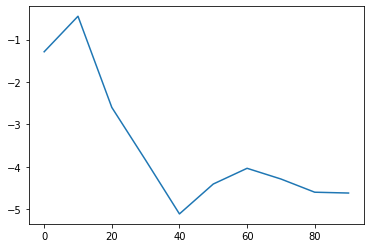

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))

s.plot()

- Series 객체의 색인은 matplotlib에서 그래프를 생성할 때 x축으로 해석됨
- use_index = False : 색인을 그래프의 축으로 사용하는 것 막을 수 있음
- x축의 눈금과 한계는 xticks와 xlim옵션으로 조절 가능
- y축은 yticks와 ylim

- 대부분 pandas 그래프 메서드는 부수적으로 ax 인자를 받는데, 이 인자는 matplotlib의 서브플롯 객체가 될 수 있음
- 이를 이용해 그리드 배열 상에서 서브플롯의 위치를 좀 더 유연하게 가져갈 수 있음

- DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 컬럼별로 선 그래프를 그리고 자동적으로 범례 생성함

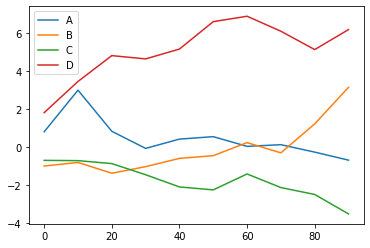

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns = ['A', 'B', 'C', 'D'],
                  index = np.arange(0, 100, 10))

df.plot()

- plot 속성에는 다양한 종류의 그래프 패밀리 존재
- df.plot() = df.plot.line()

<Series.plot 메서드 인자>
- label : 그래프의 범례 이름
- ax : 그래프를 그릴 matplotlib의 서브플롯의 객체
- style : matplotlib에 전달할 'ko--' 같은 스타일 문자열
- alpha : 그래프 투명도(0부터 1까지)
- kind : 그래프 종류('area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
- logy : y축에 대한 로그 스케일링(값이 너무 커서 줄이고 싶을 때)
- use_index : 객체의 색인을 눈금 이름으로 사용할지 여부
- rot : 눈금 이름을 로테이션(0-360)
- xticks : x축으로 사용할 값
- yticks : y축으로 사용할 값
- xlim : x축 한계(예: [0, 10])
- ylim : y축 한계
- grid : 축의 그리드를 표시할지 여부(기본값은 켜기)

- DataFrame에는 컬럼을 쉽게 다루기 위한 몇 가지 옵션이 있음
- 예를 들어, 모든 컬럼을 같은 서브플롯에 그릴 것인지 아니면 각각의 서브플롯을 만들 것인지 지정 가능
- 옵션

<DataFrame의 plot 메서드 인자>
- subplots : 각 DataFrame의 컬럼을 독립된 서브플롯에 그림
- sharex : subplots = True인 경우 같은 x축을 공유하고 눈금과 한계 연결
- sharey : subplots = True인 경우 같은 y축을 공유
- figsize : 생성될 그래프의 크기를 튜플로 지정
- title : 그래프의 제목을 문자열로 지정
- legend : 서브플롯의 범례를 추가(기본은 True)
- sort_columns : 컬럼을 알파벳 순서로 그림(기본값은 존재하는 컬럼 순서)

### **2. 막대그래프**


- plot.bar()와 plot.barh()는 각각 수직막대그래프와 수평막대그래프를 그린다.
- 이 경우 Series 또는 DataFrame의 색인은 수직막대그래프인 경우 x 눈금, 수평막댁래프인 경우 y 눈금으로 사용됨

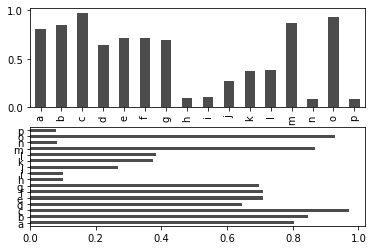

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)  ### 아래 그래프들의 틀 지정

data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))  ## 데이터

data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)  ## 위 그래프

data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7) ## 아래 그래프

- color = 'k' 옵션과 alpha = 0.7 옵션은 그래프를 검은색으로 그리고 투명도를 지정한 것
- 막대그래프를 그릴 때 유용한 방법은 Series의 value_counts 메서드(s.value_counts().plot.bar())를 이용해서 값의 빈도를 그리는 것임

- DataFrame에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여줌

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))

df

Genus,A,B,C,D
one,0.882485,0.599977,0.693265,0.702883
two,0.002916,0.500837,0.662115,0.922472
three,0.302458,0.462969,0.882353,0.787774
four,0.029124,0.596505,0.941421,0.642021
five,0.172393,0.065734,0.198377,0.520113
six,0.451576,0.868142,0.370454,0.507351


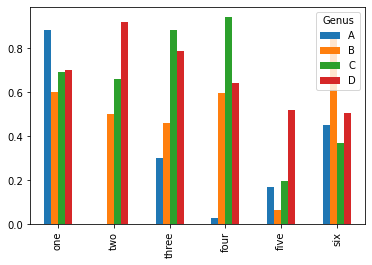

In [ ]:
df.plot.bar()

- 누적 막대그래프는 stacked = True 옵션을 사용해서 생성
- 각 로우의 값들이 하나의 막대에 누적되어 출력됨

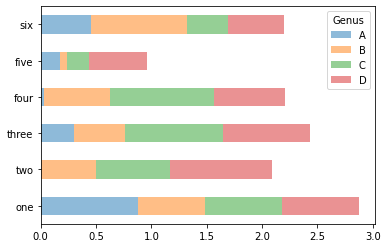

In [ ]:
df.plot.barh(stacked = True, alpha = 0.5)

- 팁 데이터
- 요일별 파티 숫자를 뽑고 파티 숫자 대비 팁 비율을 보여주는 막대그래프
- 요일과 파티 숫자에 따라 교차 테이블을 생성함

In [ ]:
pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 448 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=fe80c88333415dc5c670ecd69eb9a1f68a0e422d948ec88482d4560977e19062
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
import pydataset

tips = pydataset.data('tips')
tips

initiated datasets repo at: /root/.pydataset/


,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

## crosstab : by default, computes a frequency table of the factors

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [ ]:
party_pcts = party_counts.div(party_counts.sum(axis = 1), axis = 0) 
## 각각의 데이터를 행의 합으로 나눔
## 위의 연산을 열 별로 진행

party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


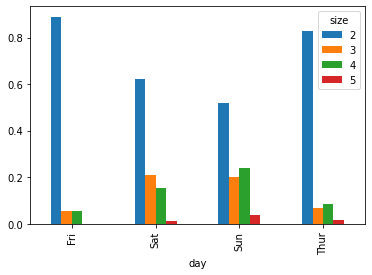

In [ ]:
party_pcts.plot.bar()

- 이 데이터에서의 파티의 규모는 주말에 커지는 경향이 있음을 알 수 있음

In [ ]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
2,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
3,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
4,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
5,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


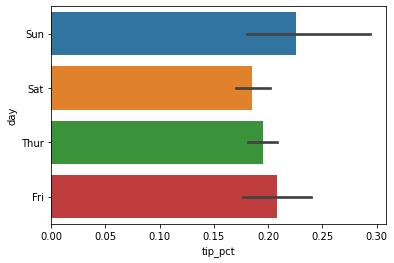

In [ ]:
sns.barplot(data = tips, x = 'tip_pct', y = 'day', orient = 'h') 
## orient는 크게 의미 없음
## 에러 막대를 포함한 요일별 팁 비율 그래프

- seaborn 플로팅 함수의 data 인자는 pandas의 DataFrame을 받음
- 다른 인자들은 컬럼 이름을 참조
- day 컬럼의 각 값에 대한 데이터는 여럿 존재하므로 tip_pct의 평균값으로 막대그래프를 그림
- 막대그래프 위에 덧그려진 검은 선은 95%의 신뢰구간을 나타냄(이 값은 옵션으로 설정 가능함)

- seaborn.barplot 메서드의 hue 옵션을 이용하면 추가 분류에 따라 나눠 그릴 수 있음

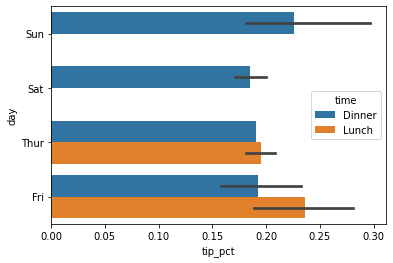

In [ ]:
sns.barplot(data = tips, x = 'tip_pct', y = 'day', hue = 'time')

- seaborn 라이브러리는 자동으로 기본 색상 팔레트, 그래프 배경, 그리드 선 색상 같은 꾸밈새를 변경함

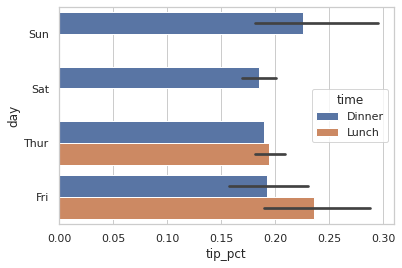

In [ ]:
sns.barplot(data = tips, x = 'tip_pct', y = 'day', hue = 'time')
sns.set(style = 'whitegrid')

### **3. 히스토그램과 밀도 그래프**

- 히스토그램은 막대그래프의 한 종류로, 값들의 빈도를 분리해서 보여줌
- 데이터 포인트는 분리되어 고른 간격의 막대로 표현되며 데이터의 숫자가 막대의 높이로 표현됨

- 전체 결제금액 대비 팁 비율

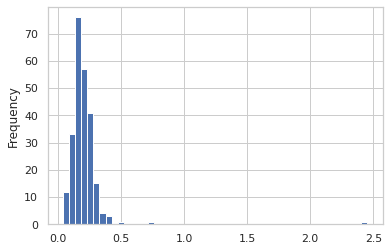

In [ ]:
tips['tip_pct'].plot.hist(bins = 50)

- 이와 관련 있는 다른 그래프로 밀도 그래프가 있음
- 밀도 그래프는 관찰값을 사용해서 추정되는 연속된 확률 분포를 그림
- 일반적인 과정은 kernel 메서드를 잘 섞어서 이 분포를 근사하는 방법인데 이보다 단순한 정규 분포임
- 그래서 밀도 그래프는 KDE 그래프라고도 알려져 있음
- plot.kde

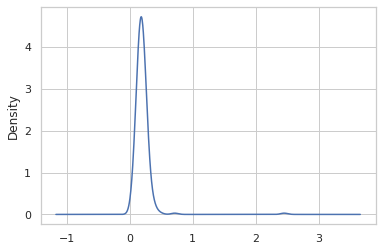

In [ ]:
tips['tip_pct'].plot.density()

- seaborn 라이브러리의 displot 메서드를 이용해서 히스토그램과 밀도 그래프를 한 번에 손쉽게 그릴 수 있음
- 예를 들어 구 개의 다른 표준정규분포로 이루어진 양봉분포를 생각해보자

In [ ]:
comp1 = np.random.normal(loc = 0, scale = 1, size = 200)
## 평균이 0
## 표준편차 1
## 정규분포의 임의 샘플들

comp2 = np.random.normal(loc = 10, scale = 2, size = 200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


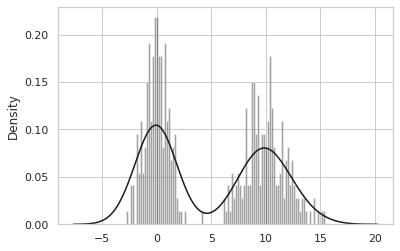

In [ ]:
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins = 100, color = 'k')

### **4. 산포도**
- 산포도(Scatter Plot, Point Plot)는 두 개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 유용한 그래프


In [ ]:
macro = pd.read_csv("macrodata.csv")
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [ ]:
trans_data = np.log(data).diff().dropna()   ## 로그차 구함

trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


- seaborn 라이브러리의 regplot 메서드를 이용해서 산포도와 선형회귀곡선을 함께 그릴 수 있음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

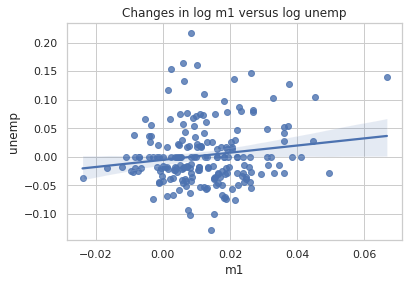

In [ ]:
sns.regplot('m1', 'unemp', data = trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

- 탐색 데이터 분석에서는 변수 그룹 간의 모든 산포도를 살펴보는 일이 매우 유용함
- 이를 짝지은 그래프 또는 산포도 행렬이라고 부름
- seaborn에서는 pairplot 함수를 제공하여 대각선을 따라 각 변수에 대한 히스토그램이나 밀도 그래프도 생성할 수 있음

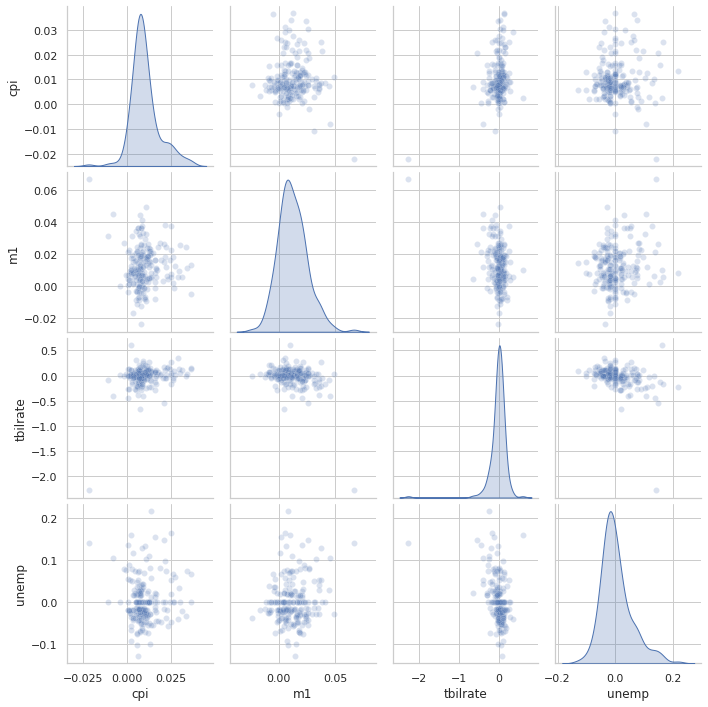

In [ ]:
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {'alpha' : 0.2})

- plot_kws 인자는 각각의 그래프에 전달할 개별 설정값을 지정함
- 설정 옵션에 관한 자세한 내용은 seaborn.pairplot 문서 참고

### **5. 패싯 그리드와 범주형 데이터**
- 추가적인 그룹 차원을 갖는 데이터 시각화
- 다양한 범주형 값을 가지는 데이터를 시각화하는 한 가지 방법은 패싯 그리드를 이용하는 것
- seaborn은 factorplot이라는 유용한 내장 함수를 제공하여 다양한 면을 나타내는 그래프를 쉽게 그릴 수 있게 도와줌

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


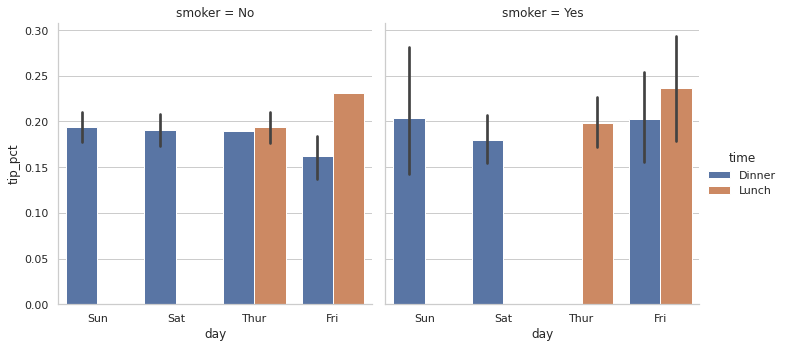

In [ ]:
sns.factorplot(data = tips[tips.tip_pct < 1], x = 'day', y = 'tip_pct', hue = 'time',
               col = 'smoker', kind = 'bar')

- time으로 그룹을 만드는 대신 패싯 안에서 막대그래프의 색상을 달리해서 보여줄 수도 있음
- 또한 패싯 그리드에 time 값에 따른 그래프를 추가할 수도 있음

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


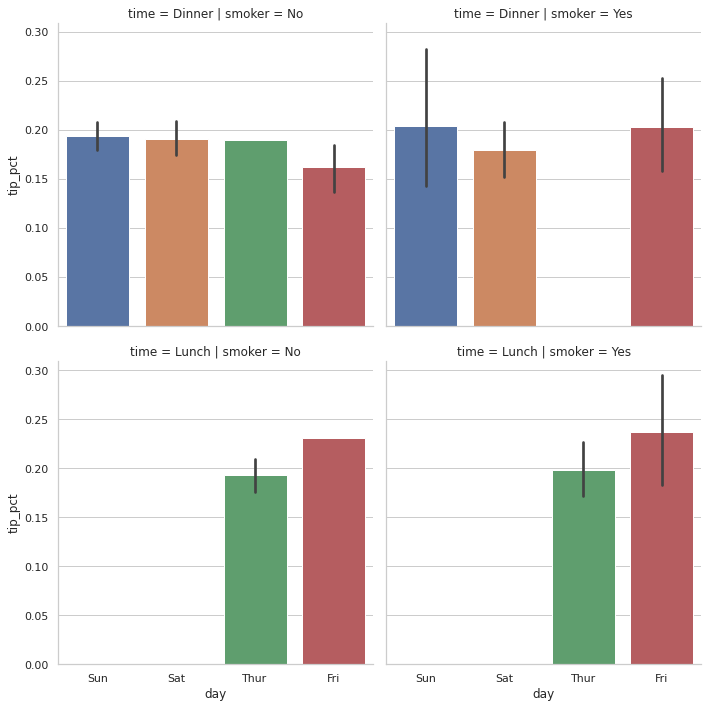

In [ ]:
sns. factorplot(data = tips[tips.tip_pct < 1], x = 'day', y = 'tip_pct', row = 'time',
                col = 'smoker', kind = 'bar')

- catplot은 보여주고자 하는 목적에 어울리는 다른 종류의 그래프도 함께 지원함
- 중간값과 사분위 그리고 특잇값을 보여주는 상자그림(box plot)이 효과적인 시각화 방법일 수 있음

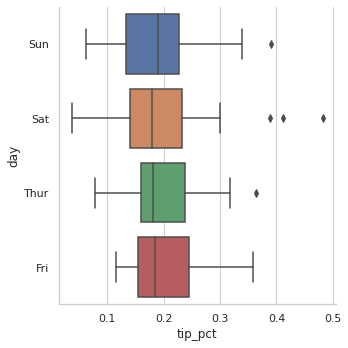

In [ ]:
sns.catplot(data = tips[tips.tip_pct < 0.5], x = 'tip_pct',
                        y = 'day', kind = 'box')

# 데이터 집계와 그룹 연산

- 데이터셋을 분류하고 각 그룹에 집계나 변형 같은 함수를 적용하는 건 데이터 분석 과정에서 무척 중요함

- 데이터를 불러오고 취합해서 하나의 데이터 집합을 준비하고 나면 그룹 통계를 구하거나 가능하다면 피벗테이블을 구해서 보고서를 만들거나 시각화함
- pandas는 데이터 집합을 자연스럽게 나누고 요약할 수 있는 groupby라는 유연한 방법을 제공함

- 하나 이상의 키(함수, 배열, DataFrame의 칼럼 이름)를 이용해서 pandas 객체를 여러 조각으로 나누는 방법
- 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
- 정규화, 선형회귀, 등급 또는 부분집합 선택 같은 집단 내 변형이나 다른 조작을 정용하는 방법
- 피벗테이블과 교차일람표를 구하는 방법
- 변위치 분석과 다른 통계 집단 분석을 수행하는 방법

## 1. GroupBy 메카닉

- 분리-적용-결합(split-apply-combine)

<그룹 연산>
- 1st: Series, DataFrame 같은 pandas 객체나 아니면 다른 객체에 들어 있는 데이터를 하나 이상의 키를 기준으로 분리함
- 2nd : 분리하고 나서는 함수를 각 그룹에 적용시켜 새로운 값을 얻어냄
- 3rd : 함수를 적용한 결과를 하나의 객체로 결합함

- 각 그룹의 색인은 다양한 형태가 될 수 있으며, 모두 같은 타입일 필요 없음



>   * 그룹으로 묶을 축과 동일한 길이의 리스트나 배열
  * DataFrame의 컬럼 이름을 지칭하는 값
  * 그룹으로 묶을 값과 그룹 이름에 대응하는 사전이나 Series 객체
  * 축 색인 혹은 색인 내의 개별 이름에 대해 실행되는 함수










In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

df

,key1,key2,data1,data2
0,a,one,-0.014544,-1.021866
1,a,two,1.860540,0.086921
2,b,one,-0.765873,-0.539455
3,b,two,-0.199069,-0.503990
4,a,one,0.193261,-1.228229


- 데이터를 key1으로 묶고 각 그룹에서 data1의 평균 구하기

In [ ]:
df.groupby('key1').mean()[['data1']]    ## 방법 1

,data1
key1,
a,0.679752
b,-0.482471


In [ ]:
grouped = df['data1'].groupby(df['key1'])  ## 방법 2

grouped.mean()

key1
a    0.679752
b   -0.482471
Name: data1, dtype: float64

- 데이터가 그룹 색인에 따라 수집되고 key1 컬럼에 있는 유일한 값으로 색인되는 새로운 Series 객체가 생성됨
- 새롭게 생성된 Series 객체의 색인은 key1임
- 이는 DataFrame 컬럼인 df['key1'] 때문임

- 여러 개의 배열을 리스트로 넘기면 조금 다른 결과가 나옴

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

means   ## 계층적 색인을 가짐

key1  key2
a     one     0.089359
      two     1.860540
b     one    -0.765873
      two    -0.199069
Name: data1, dtype: float64

In [ ]:
means.unstack()

key2,one,two
key1,,
a,0.089359,1.860540
b,-0.765873,-0.199069


- 아래 예제에서 보이듯이 길이만 같다면 어떤 배열이라도 색인으로 묶일 수 있음

In [ ]:
df

,key1,key2,data1,data2
0,a,one,-0.014544,-1.021866
1,a,two,1.860540,0.086921
2,b,one,-0.765873,-0.539455
3,b,two,-0.199069,-0.503990
4,a,one,0.193261,-1.228229


In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

years = np.array([2005, 2005, 2006, 2005, 2006])

In [ ]:
df['data1'].groupby([states, years]).mean()

California  2005    1.860540
            2006   -0.765873
Ohio        2005   -0.106806
            2006    0.193261
Name: data1, dtype: float64

- 한 그룹으로 묶을 정보는 주로 같은 DataFrame 안에서 찾게 됨
- 이 경우 컬럼 이름을 넘겨서 그룹의 색인으로 사용할 수 있음

In [ ]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.679752,-0.721058
b,-0.482471,-0.521723


In [ ]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.089359 -1.125048
     two   1.860540  0.086921
b    one  -0.765873 -0.539455
     two  -0.199069 -0.503990

- 위 df.groupby('key1').mean() 코드를 보면 key2 칼럼이 결과에서 빠져있음
- 그 이유는 df['key2']는 숫자 데이터가 아니기 때문임
- 이런 컬럼을 성가신 컬럼이라고 부르며 결과에서 제외시킴


In [ ]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

- 일반적으로 유용한 GroupBy 메서드는 그룹의 크기를 담고 있는 Series를 반환하는 size 메서드임
- 그룹 색인에서 누락된 값은 결과에서 제외됨

### **그룹 간 순회하기**

- GroupBy 객체는 이터레이션을 지원하는데, 그룹 이름과 그에 따른 데이터 묶음을 튜플로 반환함

In [ ]:
df

,key1,key2,data1,data2
0,a,one,-0.014544,-1.021866
1,a,two,1.860540,0.086921
2,b,one,-0.765873,-0.539455
3,b,two,-0.199069,-0.503990
4,a,one,0.193261,-1.228229


In [ ]:
for name, group in df.groupby('key1'):
  print(name)
  print(group)

a
  key1 key2     data1     data2
0    a  one -0.014544 -1.021866
1    a  two  1.860540  0.086921
4    a  one  0.193261 -1.228229
b
  key1 key2     data1     data2
2    b  one -0.765873 -0.539455
3    b  two -0.199069 -0.503990


In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
  print((k1, k2))
  print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.014544 -1.021866
4    a  one  0.193261 -1.228229
('a', 'two')
  key1 key2    data1     data2
1    a  two  1.86054  0.086921
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.765873 -0.539455
('b', 'two')
  key1 key2     data1    data2
3    b  two -0.199069 -0.50399


- 그룹별 데이터를 사전형으로 쉽게 바꿔서 유용하게 사용할 수 있음

In [ ]:
pieces = dict(list(df.groupby('key1')))

pieces['b']

,key1,key2,data1,data2
2,b,one,-0.765873,-0.539455
3,b,two,-0.199069,-0.503990


- groupyby 메서드는 기본적으로 axis = 0에 대해 그룹을 만듦
- 다른 축으로 그룹을 만드는 것도 가능함


In [ ]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [ ]:
for dtype, group in grouped:
  print(dtype)
  print(group)

a
0   -0.014544
1    1.860540
4    0.193261
Name: data1, dtype: float64
b
2   -0.765873
3   -0.199069
Name: data1, dtype: float64


### **컬럼이나 컬럼의 일부만 선택하기**

- df.groupby('key1')['data1']
- df.groupby('key1')[['data2']]

위 코드는 아래 코드에 대한 신택틱 슈거로 같은 결과 반환함

- df['data1'].groupby(df['key1])
- df[['data2']].groupby(df['key1'])

대용량 데이터를 다룰 경우 소수의 칼럼만 집계하고 싶을 때가 종종 있는데, 예를 들어 위 데이터에서 data2 컬럼에 대해서만 평균을 구하고 결과를 DataFrame으로 받고 싶다면 아래와 같이 작성

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -1.125048
     two   0.086921
b    one  -0.539455
     two  -0.503990

- 색인으로 얻은 객체는 groupby 메서드에 리스트나 배열을 넘겼을 경우 DataFrameGroupBy 객체가 되고, 
- 단일 값으로 하나의 컬럼 이름만 넘겼을 경우 SeriesGroupBy 객체가 된다.

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

s_grouped

In [ ]:
s_grouped.mean()

key1  key2
a     one    -1.125048
      two     0.086921
b     one    -0.539455
      two    -0.503990
Name: data2, dtype: float64

### **사전과 Series에서 그룹핑하기**

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns = ['a', 'b', 'c', 'd', 'e'],
                      index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,-1.504779,0.488356,0.661999,-0.657735,1.037217
Steve,1.503425,-0.687274,0.329920,1.182393,-0.484460
Wes,0.244702,3.180815,0.583878,0.423085,0.630823
Jim,-0.657246,-0.797083,0.645078,2.177302,0.879560
Travis,-0.703036,-0.962205,-0.227089,0.498067,0.081109


In [ ]:
people.iloc[2:3, [1, 2]] = np.nan  ## nan 값 추가

In [ ]:
people

,a,b,c,d,e
Joe,-1.504779,0.488356,0.661999,-0.657735,1.037217
Steve,1.503425,-0.687274,0.329920,1.182393,-0.484460
Wes,0.244702,NaN,NaN,0.423085,0.630823
Jim,-0.657246,-0.797083,0.645078,2.177302,0.879560
Travis,-0.703036,-0.962205,-0.227089,0.498067,0.081109


In [ ]:
mapping = {'a' : 'red', 'b' : 'red', 'c' : 'blue',
           'd' : 'blue', 'e' : 'red', 'f' : 'orange'}  ## 컬럼 그룹

In [ ]:
by_column = people.groupby(mapping, axis = 1)

by_column.sum()

,blue,red
Joe,0.004264,0.020794
Steve,1.512313,0.331691
Wes,0.423085,0.875525
Jim,2.822380,-0.574770
Travis,0.270978,-1.584131


- Series도 같은 기능 수행 가능

In [ ]:
map_series = pd.Series(mapping)

In [ ]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [ ]:
people.groupby(map_series, axis = 1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### **함수로 그룹핑하기**


- 그룹 색인으로 넘긴 함수는 색인값 하나마다 한 번씩 호출되며, 반환값은 그 그룹의 이름으로 사용됨

In [ ]:
people.groupby(len).sum()

,a,b,c,d,e
3,-1.917323,-0.308727,1.307077,1.942652,2.547600
5,1.503425,-0.687274,0.329920,1.182393,-0.484460
6,-0.703036,-0.962205,-0.227089,0.498067,0.081109


- 내부적으로는 모두 배열로 변환되므로 함수를 배열, 사전 또는 Series와 섞어 쓰더라고 문제되지 않음

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']

people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.504779  0.488356  0.661999 -0.657735  0.630823
  two -0.657246 -0.797083  0.645078  2.177302  0.879560
5 one  1.503425 -0.687274  0.329920  1.182393 -0.484460
6 two -0.703036 -0.962205 -0.227089  0.498067  0.081109

### **색인 단계로 그룹핑하기**

- 계층적으로 색인된 데이터는 축 색인의 단계 중 하나를 사용해서 편리하게 집계할 수 있는 기능을 제공함

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                    names = ['cty', 'tenor'])

In [ ]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns = columns)

hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.873557 -2.081570  0.707651 -0.695284 -2.314000
1     -0.507032 -0.624227  1.781675 -0.989670 -0.390880
2      0.427382  0.108743 -0.487722  1.050302 -0.911046
3      0.840668 -0.850947  1.148451 -0.320879  0.159610

In [ ]:
hier_df.groupby(level = 'cty', axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 2. 데이터 집계

- 데이터 집계는 배열로부터 스칼라값을 만들어내는 모든 데이터 변환 작업을 말함

<최적화된 groupby 메서드>
- count : 그룹에서 NA가 아닌 값의 수를 반환
- sum : NA가 아닌 값들의 합을 구함
- mean : NA가 아닌 값들의 평균을 구함
- median : NA가 아닌 값들의 산술 중간값을 구함
- std, var : 편향되지 않은(n - 1을 분모로 하는) 표준편차와 분산
- min, max : NA가 아닌 값들 중 최솟값과 최댓값
- prod : NA가 아닌 값들의 곱
- first, last : NA가 아닌 값들 중 첫째 값과 마지막 값

In [ ]:
df

,key1,key2,data1,data2
0,a,one,-0.014544,-1.021866
1,a,two,1.860540,0.086921
2,b,one,-0.765873,-0.539455
3,b,two,-0.199069,-0.503990
4,a,one,0.193261,-1.228229


In [ ]:
grouped = df.groupby('key1')

grouped['data1'].quantile(0.9)  ## quantile은 컬럼의 변위치를 계산함

key1
a    1.527084
b   -0.255749
Name: data1, dtype: float64

In [ ]:
def peak_to_peak(arr):
  return arr.max() - arr.min()

In [ ]:
grouped.agg(peak_to_peak)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,data1,data2
key1,,
a,1.875084,1.315150
b,0.566804,0.035465


In [ ]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.679752  1.027857 -0.014544  0.089359  0.193261  1.026901   
b      2.0 -0.482471  0.400791 -0.765873 -0.624172 -0.482471 -0.340770   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.860540   3.0 -0.721058  0.707297 -1.228229 -1.125048 -1.021866   
b    -0.199069   2.0 -0.521723  0.025078 -0.539455 -0.530589 -0.521723   

                          
           75%       max  
key1                      
a    -0.467473  0.086921  
b    -0.512856 -0.503990

- 사용자 정의 집계함수는 중간 데이터를 생성하는 과정에서 함수 호출이나 데이터 정렬 같은 오버헤드가 발생하므로 느리게 작동함

### **컬럼에 여러 가지 함수 적용하기**

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
2,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
3,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
4,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
5,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
243,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


- 컬럼에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용할 수 있음

In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']

grouped_pct

In [ ]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.179740  0.039458      0.094263
     Yes     0.216293  0.077530      0.242219
Sat  No      0.190412  0.058626      0.352192
     Yes     0.179833  0.089496      0.446137
Sun  No      0.193617  0.060302      0.274897
     Yes     0.322021  0.538061      2.382107
Thur No      0.193424  0.056065      0.284273
     Yes     0.198508  0.057170      0.219047

- 이름과 함수가 담긴 (name, function) 튜플의 리스트를 넘기면 각 튜플에서 첫 번째 원소가 DataFrame에서 컬럼 이름으로 사용됨(2개의 튜플을 갖는 리스트가 순서대로 매핑됨)

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.179740  0.039458
     Yes     0.216293  0.077530
Sat  No      0.190412  0.058626
     Yes     0.179833  0.089496
Sun  No      0.193617  0.060302
     Yes     0.322021  0.538061
Thur No      0.193424  0.056065
     Yes     0.198508  0.057170

- DataFrame은 컬럼마다 다른 함수를 적용하거나 여러 개의 함수를 모든 컬럼에 적용할 수 있음

In [ ]:
functions = ['count', 'mean', 'max']

result = grouped['tip_pct', 'total_bill'].agg(functions)

result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.179740  0.231125          4  18.420000  22.75
     Yes         15  0.216293  0.357737         15  16.813333  40.17
Sat  No          45  0.190412  0.412409         45  19.661778  48.33
     Yes         42  0.179833  0.483092         42  21.276667  50.81
Sun  No          57  0.193617  0.338101         57  20.506667  48.17
     Yes         19  0.322021  2.452381         19  24.120000  45.35
Thur No          45  0.193424  0.362976         45  17.113111  41.19
     Yes         17  0.198508  0.317965         17  19.190588  43.11

In [ ]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.179740  0.231125
     Yes        15  0.216293  0.357737
Sat  No         45  0.190412  0.412409
     Yes        42  0.179833  0.483092
Sun  No         57  0.193617  0.338101
     Yes        19  0.322021  2.452381
Thur No         45  0.193424  0.362976
     Yes        17  0.198508  0.317965

In [ ]:
ftuples = [('Durchschinitt', 'mean'), ('Abweichung', np.var)]

In [ ]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


tip_pct               total_bill            
            Durchschinitt Abweichung Durchschinitt  Abweichung
day  smoker                                                   
Fri  No          0.179740   0.001557     18.420000   25.596333
     Yes         0.216293   0.006011     16.813333   82.562438
Sat  No          0.190412   0.003437     19.661778   79.908965
     Yes         0.179833   0.008010     21.276667  101.387535
Sun  No          0.193617   0.003636     20.506667   66.099980
     Yes         0.322021   0.289509     24.120000  109.046044
Thur No          0.193424   0.003143     17.113111   59.625081
     Yes         0.198508   0.003268     19.190588   69.808518

- 칼럼마다 다른 함수를 적용하고 싶다면 agg 메서드에 컬럼 이름에 대응하는 함수가 들어 있는 사진을 넘기면 됨

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [ ]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.136861  0.231125  0.179740  0.039458    9
     Yes     0.115518  0.357737  0.216293  0.077530   31
Sat  No      0.060217  0.412409  0.190412  0.058626  115
     Yes     0.036955  0.483092  0.179833  0.089496  104
Sun  No      0.063204  0.338101  0.193617  0.060302  167
     Yes     0.070274  2.452381  0.322021  0.538061   49
Thur No      0.078704  0.362976  0.193424  0.056065  112
     Yes     0.098918  0.317965  0.198508  0.057170   40

- 단 하나의 컬럼에라도 여러 개의 함수가 적용되었다면 DataFrame은 계층적인 컬럼을 가지게 된다.

### **색인되지 않은 형태로 집계된 데이터 반환하기**

- groupby에서 as_index = False를 넘겨서 색인되지 않도록 할 수 있음

In [ ]:
tips.groupby(['day', 'smoker'], as_index = False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.179740
1,Fri,Yes,16.813333,2.714000,2.066667,0.216293
2,Sat,No,19.661778,3.102889,2.555556,0.190412
3,Sat,Yes,21.276667,2.875476,2.476190,0.179833
4,Sun,No,20.506667,3.167895,2.929825,0.193617
5,Sun,Yes,24.120000,3.516842,2.578947,0.322021
6,Thur,No,17.113111,2.673778,2.488889,0.193424
7,Thur,Yes,19.190588,3.030000,2.352941,0.198508


- 이렇게 하지 않고 색인된 결과에 대해 reset_index 메서드를 호출해서 같은 결과를 얻을 수 있음

## 3. Apply: 일반적인 분리-적용-병합

In [ ]:
def top(df, n = 5, column = 'tip_pct'):
  return df.sort_values(by = column)[-n:]

top(tips, n = 6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
110,14.31,4.00,Female,Yes,Sat,Dinner,2,0.387973
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.389922
233,11.61,3.39,Male,No,Sat,Dinner,2,0.412409
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.483092
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286
173,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381


In [ ]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     89        24.71  5.85    Male     No  Thur   Lunch     2  0.310180
       186       20.69  5.00    Male     No   Sun  Dinner     5  0.318674
       52        10.29  2.60  Female     No   Sun  Dinner     2  0.338101
       150        7.51  2.00    Male     No  Thur   Lunch     2  0.362976
       233       11.61  3.39    Male     No   Sat  Dinner     2  0.412409
Yes    110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.387973
       184       23.17  6.50    Male    Yes   Sun  Dinner     4  0.389922
       68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.483092
       179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.714286
       173        7.25  5.15    Male    Yes   Sun  Dinner     2  2.452381

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n = 1, column = 'total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  95        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  213       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  157       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 143       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  96        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  171       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  183       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 198       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  95   0.166667  
       Sat  213  0.228833  
       Sun  157  0.115821  
       Thur 143  0.138160  
Yes    Fri  96   0.133465  
       Sat  171  0.245038  
       Sun  183  0.083632  
       Thur 198  0.131199

In [ ]:
result = tips.groupby('smoker')['tip_pct'].describe()

result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.192237,0.057665,0.060217,0.158622,0.184308,0.227015,0.412409
Yes,93.0,0.218176,0.254295,0.036955,0.119534,0.181818,0.242326,2.452381


In [ ]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.192237
       Yes         0.218176
std    No          0.057665
       Yes         0.254295
min    No          0.060217
       Yes         0.036955
25%    No          0.158622
       Yes         0.119534
50%    No          0.184308
       Yes         0.181818
75%    No          0.227015
       Yes         0.242326
max    No          0.412409
       Yes         2.452381
dtype: float64

- f = lambda x: x.describe()
- grouped.apply(f)

- describe 같은 메서드를 호출하면 GroupBy 내부적으로 위와 같은 단계 수행함

### **그룹 색인 생략하기**

In [ ]:
tips.groupby('smoker', group_keys = False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
89,24.71,5.85,Male,No,Thur,Lunch,2,0.310180
186,20.69,5.00,Male,No,Sun,Dinner,5,0.318674
52,10.29,2.60,Female,No,Sun,Dinner,2,0.338101
150,7.51,2.00,Male,No,Thur,Lunch,2,0.362976
233,11.61,3.39,Male,No,Sat,Dinner,2,0.412409
110,14.31,4.00,Female,Yes,Sat,Dinner,2,0.387973
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.389922
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.483092
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286
173,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381


### **변위치 분석과 버킷 분석**


In [ ]:
frame = pd.DataFrame({'data1' : np.random.randn(1000),
                      'data2' : np.random.randn(1000)})

In [ ]:
quartiles = pd.cut(frame.data1, 4)

In [ ]:
quartiles[:10]

0    (-0.201, 1.458]
1    (-0.201, 1.458]
2    (-0.201, 1.458]
3    (-0.201, 1.458]
4    (-1.86, -0.201]
5    (-1.86, -0.201]
6    (-0.201, 1.458]
7    (-0.201, 1.458]
8    (-0.201, 1.458]
9    (-0.201, 1.458]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.525, -1.86] < (-1.86, -0.201] < (-0.201, 1.458] <
                                           (1.458, 3.117]]

In [ ]:
def get_stats(group):
  return {'min' : group.min(),'max' : group.max(),
          'count' : group.count(), 'mean' : group.mean()}

In [ ]:
grouped = frame.data2.groupby(quartiles)  ## dataframe이 아닌 Series 형태로 적용해야 됨

NameError: ignored

In [ ]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.525, -1.86]",-1.932068,1.807115,26.0,0.112782
"(-1.86, -0.201]",-3.105657,2.865111,387.0,-0.026000
"(-0.201, 1.458]",-3.291510,2.704808,526.0,0.019478
"(1.458, 3.117]",-2.483275,2.102529,61.0,-0.009940


- qcut : 표본 변위치에 기반하여 크기가 같은 버킷을 계산

In [ ]:
grouping = pd.qcut(frame.data1, 10, labels = False)

grouped = frame.data2.groupby(grouping)

In [ ]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.967108,2.712165,100.0,0.020265
1,-2.650021,2.842664,100.0,-0.040384
2,-2.573634,2.516187,100.0,-0.087801
3,-3.105657,2.865111,100.0,0.030338
4,-2.001594,2.248700,100.0,0.127319
5,-2.938428,2.203966,100.0,0.031715
6,-2.409586,2.465875,100.0,-0.059119
7,-3.291510,2.685021,100.0,0.020881
8,-1.798867,2.704808,100.0,-0.005153


### **예제 : 그룹에 따른 값으로 결측치 채우기**

In [ ]:
s = pd.Series(np.random.randn(6))

s[::2] = np.nan

s

0         NaN
1   -1.587166
2         NaN
3    0.595814
4         NaN
5    0.461677
dtype: float64

In [ ]:
s.fillna(s.mean())

0   -0.176558
1   -1.587166
2   -0.176558
3    0.595814
4   -0.176558
5    0.461677
dtype: float64

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

group_key = ['East'] * 4 + ['West'] * 4

data = pd.Series(np.random.randn(8), index = states)

data

Ohio         -1.484098
New York      0.082672
Vermont       2.623746
Florida      -0.665451
Oregon        1.048523
Nevada       -1.434340
California    1.000436
Idaho         1.540653
dtype: float64

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

data

Ohio         -1.484098
New York      0.082672
Vermont            NaN
Florida      -0.665451
Oregon        1.048523
Nevada             NaN
California    1.000436
Idaho              NaN
dtype: float64

In [ ]:
data.groupby(group_key).mean()

East   -0.688959
West    1.024479
dtype: float64

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())

data.groupby(group_key).apply(fill_mean)

Ohio         -1.484098
New York      0.082672
Vermont      -0.688959
Florida      -0.665451
Oregon        1.048523
Nevada        1.024479
California    1.000436
Idaho         1.024479
dtype: float64

- 그룹에 따라 미리 정의된 다른 값을 채워 넣어야 할 경우도 있음

In [ ]:
fill_values = {'East' : 0.5, 'West' : -1}

fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio         -1.484098
New York      0.082672
Vermont       0.500000
Florida      -0.665451
Oregon        1.048523
Nevada       -1.000000
California    1.000436
Idaho        -1.000000
dtype: float64

### **예제 : 랜덤 표본과 순열**

- 트럼프 카드 덱

In [ ]:
suits = ['H', 'S', 'C', 'D']  ## 하트, 스페이드, 클럽, 다이아몬드
card_val = (list(range(1, 11)) + [10] *3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []

for suit in ['H', 'S', 'C', 'D'] :
  cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index = cards)

In [ ]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [ ]:
## 5장의 카드 뽑기
def draw(deck, n = 5):
  return deck.sample(n)

draw(deck)

7S    7
3S    3
2H    2
3D    3
5H    5
dtype: int64

In [ ]:
## 각 세트(하트, 스페이드, 클럽, 다이아몬드)별로 2장의 카드를 무작위로 뽑기
get_suit = lambda card: card[-1]

deck.groupby(get_suit).apply(draw, n = 2)

C  2C     2
   5C     5
D  QD    10
   3D     3
H  QH    10
   3H     3
S  9S     9
   JS    10
dtype: int64

In [ ]:
deck.groupby(get_suit, group_keys = False).apply(draw, n = 2)

8C      8
2C      2
8D      8
QD     10
6H      6
10H    10
AS      1
QS     10
dtype: int64

### **예제 : 그룹 가중 평균과 상관관계**

In [ ]:
df = pd.DataFrame({'category' : ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                   'data' : np.random.randn(8),
                   'weights' : np.random.randn(8)})
df

,category,data,weights
0,a,-1.115911,-2.155814
1,a,1.414101,0.975402
2,a,0.413695,1.663642
3,a,-1.099164,1.243109
4,b,-0.718448,-0.167376
5,b,1.073245,0.177643
6,b,0.208614,-0.524514
7,b,0.570765,3.014965


In [ ]:
grouped = df.groupby('category')

get_wavg = lambda g: np.average(g['data'], weights = g['weights'])

grouped.apply(get_wavg)

category
a    1.799690
b    0.768708
dtype: float64

### **예제: 그룹상의 선형회귀**

- 계량경제 라이브러리인 statsmodel를 사용해서 regress라는 함수를 작성하고 각 데이터 묶음마다 최소제곱으로 회귀를 수행할 수 있음

In [ ]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
  Y = data[yvar]
  X = data[xvars]
  X['intercept'] = 1.
  result = sm.OLS(Y, X).fit()
  return result.params

## 4. 피벗테이블과 교차알림표

- 피벗테이블은 스프레드시트 프로그램과 그 외 다른 데이터 분석 소프트웨어에서 흔히 볼 수 있는 데이터 요약화 도구임
- 피벗테이블은 하나 이상의 키로 수집해서 어떤 키는 로우에, 어떤 키는 컬럼에 나열해서 데이터를 정렬함
- DataFrame에는 pivot_table 메서드가 있음
- goupby를 위한 편리한 인터페이스를 제공하기 위해 pivot_table은 마진이라고 하는 부분합을 추가할 수 있는 기능을 제공함

In [ ]:
pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 18.8 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=7ef3705ab5ab7ffe4c008a90baca0bf832f6615133589d2bd4854c7aa3248f26
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
import pydataset

tips = pydataset.data('tips')
tips

initiated datasets repo at: /root/.pydataset/


,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
2,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
3,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
4,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
5,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
243,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


In [ ]:
tips.pivot_table(index = ['day', 'smoker'])

size       tip  total_bill
day  smoker                                
Fri  No      2.250000  2.812500   18.420000
     Yes     2.066667  2.714000   16.813333
Sat  No      2.555556  3.102889   19.661778
     Yes     2.476190  2.875476   21.276667
Sun  No      2.929825  3.167895   20.506667
     Yes     2.578947  3.516842   24.120000
Thur No      2.488889  2.673778   17.113111
     Yes     2.352941  3.030000   19.190588

- 이를 groupby를 사용해 쉽게 구할 수 있음
- tip_pct와 size에 대해서만 집계를 하고 날짜 별로 그룹지어보기
- 이를 위해 day와 smoker 컬럼 추가하기

In [ ]:
tips.groupby(['day', 'smoker']).mean()

total_bill       tip      size
day  smoker                                
Fri  No       18.420000  2.812500  2.250000
     Yes      16.813333  2.714000  2.066667
Sat  No       19.661778  3.102889  2.555556
     Yes      21.276667  2.875476  2.476190
Sun  No       20.506667  3.167895  2.929825
     Yes      24.120000  3.516842  2.578947
Thur No       17.113111  2.673778  2.488889
     Yes      19.190588  3.030000  2.352941

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.162612  0.202545
       Sat   2.555556  2.476190  0.190412  0.179833
       Sun   2.929825  2.578947  0.193617  0.322021
       Thur  2.000000       NaN  0.190114       NaN
Lunch  Fri   3.000000  1.833333  0.231125  0.236915
       Thur  2.500000  2.352941  0.193499  0.198508

- 이 테이블은 margins = True를 넘겨서 부분합을 포함하도록 확장할 수 있음

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker', margins = True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.162612  0.202545  0.192562
       Sat   2.555556  2.476190  2.517241  0.190412  0.179833  0.185305
       Sun   2.929825  2.578947  2.842105  0.193617  0.322021  0.225718
       Thur  2.000000       NaN  2.000000  0.190114       NaN  0.190114
Lunch  Fri   3.000000  1.833333  2.000000  0.231125  0.236915  0.236088
       Thur  2.500000  2.352941  2.459016  0.193499  0.198508  0.194895
All          2.668874  2.408602  2.569672  0.192237  0.218176  0.202123

- 여기서 All 값은 흡연자와 비흡연자를 구분하지 않은 평균값(All 컬럼)이거나 로우에서 두 단계를 묶은 그룹의 평균값
- 다른 집계 함수를 사용하려면 그냥 aggfunc로 넘기면 됨

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker', margins = True, aggfunc = len)

size            tip_pct           
smoker          No   Yes  All      No   Yes  All
time   day                                      
Dinner Fri     3.0   9.0   12     3.0   9.0   12
       Sat    45.0  42.0   87    45.0  42.0   87
       Sun    57.0  19.0   76    57.0  19.0   76
       Thur    1.0   NaN    1     1.0   NaN    1
Lunch  Fri     1.0   6.0    7     1.0   6.0    7
       Thur   44.0  17.0   61    44.0  17.0   61
All          151.0  93.0  244   151.0  93.0  244

- 어떤 조합이 비어있다면 fill_value를 넘길 수도 있음

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker', fill_value = 0)

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.162612  0.202545
       Sat   2.555556  2.476190  0.190412  0.179833
       Sun   2.929825  2.578947  0.193617  0.322021
       Thur  2.000000  0.000000  0.190114  0.000000
Lunch  Fri   3.000000  1.833333  0.231125  0.236915
       Thur  2.500000  2.352941  0.193499  0.198508

<pivot_table 옵션>
- values : 집계하려는 컬럼 이름 혹은 이름의 리스트(기본적으로 모든 숫자 컬럼 집계)
- index : 만들어지는 피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키
- columns : 만들어지는 피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키
- aggfunc : 집계함수나 함수 리스트, 기본값으로 'mean'이 사용됨. groupby 컨텍스트 안에서 유효한 어떤 함수라도 가능함
- fill_value : 결과 테이블에서 누락된 값을 대체하기 위한 값
- dropna : True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음
- margins : 부분합이나 총계를 담기 위한 로우/컬럼을 추가할지 여부. 기본값은 False

### **교차일람표**


- 교차일람표(교차표)는 그룹 빈도를 계산하기 위한 피벗테이블의 특수한 경우임 (그룹 빈도만 가능하고 함수 변경 불가)
- pivot_table 메서드보다 pandas.crosstab함수가 훨씬 편리함

In [ ]:
mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
df=pd.crosstab(mpg['class'], mpg['manufacturer']) 

df 

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 시계열

- 시계열 데이터는 금융, 경제, 생태학, 물리학 등 여러 다양한 분야에서 사용되는 매우 중요한 구조화된 데이터임

- 시간상의 여러 지점을 관측하거나 측정할 수 있는 모든 것이 시계열임

- 대부분의 시계열은 고정빈도(fixed frequency)로 표현되는데 데이터가 존재하는 지점이 15초마다, 5분마다, 한 달에 한 번 같은 특정 규칙에 따라 고정 간격을 가지게 됨


- 시계열은 고정된 단위나 시간 혹은 단위들 간의 간격으로 존재하지 않고 불규칙한 모습으로 표현될 수도 있음

## 1. 날짜, 시간 자료형, 도구

- datetime (가장 많이 사용됨)
- time
- calender

In [ ]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2022, 9, 30, 3, 40, 25, 685626)

In [ ]:
now.year

2022

In [ ]:
now.month, now.day

(9, 30)

- datetime은 날짜와 시간 모두 저장하며 마이크로초까지 지원함
- datetime.timedelta는 두 datetime 객체 간의 시간적인 차이를 표현할 수 있음

In [ ]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

delta

datetime.timedelta(days=926, seconds=56700)

In [ ]:
delta.days

926

In [ ]:
delta.seconds

56700

- timedelta를 더하거나 빼면 그만큼의 시간이 datetime 객체에 적용되어 새로운 객체를 만들 수 있음

In [ ]:
from datetime import timedelta

In [ ]:
start = datetime(2011, 1, 7)

start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [ ]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

<datetime 모듈의 자료형>
- date : 날짜(연, 월, 일)
- time : 하루의 시간을 시, 분, 초, 마이크로초 단위
- datetime : 날짜와 시간 저장
- timedelta : 두 datetime 값 간의 차이를 표현
- tzinfo : 지역시간대를 저장하기 위한 기본 자료형

### **문자열을 datetime으로 변환하기**

- str 메서드나 strftime 메서드에 포맷 규칙을 넘겨서 문자열로 나타낼 수 있음


> - strftime : time으로부터 string으로 바꾸기
- strptim : string을 time으로 바꾸기



- strftime

In [ ]:
stamp = datetime(2011, 1, 3)

In [ ]:
str(stamp)

'2011-01-03 00:00:00'

In [ ]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

- strptime

In [ ]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- 흔히 쓰는 날짜 형식의 경우 dateutil에 포함된 parser.parse 메서드 사용
- dateutil은 거의 대부분의 사람이 인지하는 날짜 표현 방식을 파싱할 수 있음

In [ ]:
from dateutil.parser import parse

In [ ]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
parse('Jan 31, 1997, 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [ ]:
parse('6/12/2011', dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

- pandas는 일반적으로 DataFrame의 컬럼이나 축 색인으로 날짜가 담기 배열을 사용함
- to_datetime 메서드는 많은 종류의 날짜 표현을 처리함

In [ ]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

- 누락된 값으로 간주되어야 할 값도 처리해줌

In [ ]:
idx = pd.to_datetime(datestrs + [None])

idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx[2]

NaT

In [ ]:
pd.isnull(idx)

array([False, False,  True])

- NaT(Not a Time)은 pandas에서 누락된 타임스탬프 데이터를 나타냄

### **시계열 기초(Time Series 만들기)**

In [ ]:
pd.date_range(start = '1/1/2000', end = '2/1/2000')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('1/1/2000', '1/2/2000', freq = '5h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:00:00',
               '2000-01-01 10:00:00', '2000-01-01 15:00:00',
               '2000-01-01 20:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [ ]:
dates = pd.date_range('1/1/2000', '1/12/2000', freq = '2D')
dates

DatetimeIndex(['2000-01-01', '2000-01-03', '2000-01-05', '2000-01-07',
               '2000-01-09', '2000-01-11'],
              dtype='datetime64[ns]', freq='2D')

In [ ]:
ts = pd.Series(np.random.randint(6), index = dates)
ts

2000-01-01    5
2000-01-03    5
2000-01-05    5
2000-01-07    5
2000-01-09    5
2000-01-11    5
Freq: 2D, dtype: int64

In [ ]:
ts[2]

5

In [ ]:
ts[::2]

2000-01-01    5
2000-01-05    5
2000-01-09    5
Freq: 4D, dtype: int64

In [ ]:
ts + ts[::2]

2000-01-01    10.0
2000-01-03     NaN
2000-01-05    10.0
2000-01-07     NaN
2000-01-09    10.0
2000-01-11     NaN
dtype: float64

- pandas에서 찾아볼 수 있는 가장 기본적인 시계열 객체의 종류는 파이썬 문자열이나 datetime 객체로 표현되는 타임스탬프로 색인된 Series

In [ ]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]


dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [ ]:
import numpy as n

ts = pd.Series(np.random.randn(6), index = dates)
ts

2011-01-02    0.153264
2011-01-05    0.168389
2011-01-07    0.952127
2011-01-08    1.204360
2011-01-10    0.162910
2011-01-12   -0.363123
dtype: float64

In [ ]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

- 서로 다르게 색인된 시계열 객체 간의 산술 연산은 자동으로 맞춰짐

In [ ]:
ts + ts[::2]

2011-01-02    0.306529
2011-01-05         NaN
2011-01-07    1.904254
2011-01-08         NaN
2011-01-10    0.325821
2011-01-12         NaN
dtype: float64

In [ ]:
ts.index.dtype

dtype('<M8[ns]')

In [ ]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

- DatetimeIndex의 스칼라값은 pandas의 Timestamp 객체임

- Timestamp는 datetime 객체를 사용하는 어떤 곳에도 대체 사용이 가능함

### **색인, 선택, 부분 선택**

- 시계열은 라벨에 기반해서 데이터를 선택하고 인덱싱할 때 pandas.Series와 동일하게 동작함

In [ ]:
stamp = ts.index[2]

ts[stamp]

0.952127121896065

In [ ]:
ts['1/10/2011']

0.1629103317210155

In [ ]:
ts['20110110']

0.1629103317210155

- 긴 시계열에서는 연을 넘기거나 연, 월만 넘겨서 데이터의 일부 구간만 선택할 수도 있음

In [ ]:
longer_ts = pd.Series(np.random.randn(1000),
                      index = pd.date_range('1/1/2000', periods = 1000))

longer_ts

2000-01-01   -0.327993
2000-01-02    0.505345
2000-01-03   -0.308887
2000-01-04    0.845089
2000-01-05   -0.445540
                ...   
2002-09-22    0.029528
2002-09-23   -1.223248
2002-09-24   -1.165581
2002-09-25    2.138870
2002-09-26    0.625145
Freq: D, Length: 1000, dtype: float64

In [ ]:
longer_ts['2001']

2001-01-01    0.787807
2001-01-02   -0.000252
2001-01-03   -0.953139
2001-01-04    1.027959
2001-01-05    1.887341
                ...   
2001-12-27    0.619326
2001-12-28   -0.521473
2001-12-29   -1.088730
2001-12-30   -1.897868
2001-12-31   -0.880571
Freq: D, Length: 365, dtype: float64

- 여기서 문자열 '2001은 연도로 해석되어 해당 기간의 데이터를 선택함
- 월도 마찬가지임

In [ ]:
longer_ts['2001-05']

2001-05-01    0.774737
2001-05-02   -1.118313
2001-05-03   -0.047579
2001-05-04    0.564883
2001-05-05    0.014533
2001-05-06   -0.427489
2001-05-07   -0.349306
2001-05-08    1.779173
2001-05-09   -1.557628
2001-05-10    0.137588
2001-05-11   -0.508202
2001-05-12    0.119291
2001-05-13   -2.297209
2001-05-14   -0.815444
2001-05-15    0.930063
2001-05-16   -0.672627
2001-05-17   -1.458877
2001-05-18   -0.525750
2001-05-19    0.391688
2001-05-20    0.170510
2001-05-21    1.103535
2001-05-22   -0.799996
2001-05-23   -0.219317
2001-05-24   -1.761296
2001-05-25   -1.587041
2001-05-26   -0.662565
2001-05-27   -0.038759
2001-05-28    1.422923
2001-05-29   -0.171085
2001-05-30   -0.478747
2001-05-31    0.711254
Freq: D, dtype: float64

- datetime 객체로 데이터를 잘라내는 작업은 일반적인 Series와 동일한 방식으로 함

In [ ]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.952127
2011-01-08    1.204360
2011-01-10    0.162910
2011-01-12   -0.363123
dtype: float64

- 대부분의 시계열 데이터는 연대순으로 정렬되기 때문에 범위를 지정하기 위해 시계열에 포함되지 않고 타임스탬프를 이용해서 Series를 나눌 수 있음

In [ ]:
ts

2011-01-02    0.153264
2011-01-05    0.168389
2011-01-07    0.952127
2011-01-08    1.204360
2011-01-10    0.162910
2011-01-12   -0.363123
dtype: float64

In [ ]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.952127
2011-01-08    1.204360
2011-01-10    0.162910
dtype: float64

- 날짜 문자열이나 datetime 혹은 타임스탬프를 넘기면 원본 시계열에 대한 뷰를 생성함
- 데이터 복사가 발생하지 않고 슬라이스에 대한 변경이 원본 데이터에도 반영됨
- 동일한 인스턴스 메서드에 truncate가 있음
- truncate는 TimeSeries를 두 개의 날짜로 나눔

In [ ]:
ts.truncate(after='1/9/2011')

2011-01-02    0.153264
2011-01-05    0.168389
2011-01-07    0.952127
2011-01-08    1.204360
dtype: float64

- 위 방식은 DateFrame에서도 동일하게 적용되며 로우에 인덱싱 됨

In [ ]:
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED')   ### 1/1/2000부터 100개의 매 주 수요일의 날짜

dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [ ]:
long_df = pd.DataFrame(np.random.randn(100, 4), index = dates,
                       columns = ['Colorado', 'Texas', 'New York', 'Ohio'])

In [ ]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.332625,-0.540521,-0.463890,-0.598399
2001-05-09,0.807965,1.835070,-0.062246,-1.910300
2001-05-16,-0.768930,-0.441025,0.756389,0.790307
2001-05-23,-0.444657,-0.790479,0.236438,-0.070292
2001-05-30,-1.100559,0.997905,-0.041601,1.357844


### **중복된 색인을 갖는 시계열**


In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dup_ts = pd.Series(np.arange(5), index = dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

- is_unique 속성을 통해 확인해보면 색인이 유일하지 않음을 알 수 있음

In [ ]:
dup_ts.index.is_unique

False

- 이 시계열 데이터를 인덱싱하면 타임스탬프의 중복 여부에 따라 스칼라값이나 슬라이스 생성됨

In [ ]:
dup_ts['1/3/2000'] # 중복 없음

4

In [ ]:
dup_ts['1/2/2000'] # 중복 있음

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

- 유일하지 않은 타임스탬프를 가지는 데이터를 집계한다고 가정
- 한 가지 방법은 groupby에 level = 0(단일 단계 인덱싱)을 넘기는 것

In [ ]:
grouped = dup_ts.groupby(level = 0)  ## level은 index를 표현하는 방법임

In [ ]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [ ]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [ ]:
df = pd.DataFrame(ts)
df = df.reset_index()
df

,index,0
0,2011-01-02,0.153264
1,2011-01-05,0.168389
2,2011-01-07,0.952127
3,2011-01-08,1.204360
4,2011-01-10,0.162910
5,2011-01-12,-0.363123


In [ ]:
df.groupby('index').mean()

,0
index,
2011-01-02,0.153264
2011-01-05,0.168389
2011-01-07,0.952127
2011-01-08,1.204360
2011-01-10,0.162910
2011-01-12,-0.363123


## 3. 날짜 범위, 빈도, 이동

- pandas에서 일반적인 시계열은 불규칙적인 것으로 간주됨
- 고정된 빈도를 갖지 않음
- 하지만 시계열 안에서 누락된 값이 발생할지라도 일별, 월별 혹은 매 15분 같은 상대적인 고정 빈도에서 작업이 요구되는 경우가 종종 있음
- pandas에는 리샘플링, 표준 시계열 빈도 모음, 빈도 추론, 그리고 고정된 빈도의 날짜 범위를 도구가 있음

- 고정된 일 빈도로 변환하려면 resample 메서드 사용

In [ ]:
ts

2011-01-02    0.153264
2011-01-05    0.168389
2011-01-07    0.952127
2011-01-08    1.204360
2011-01-10    0.162910
2011-01-12   -0.363123
dtype: float64

In [ ]:
resampler = ts.resample('D')

resampler

In [ ]:
list(resampler)

[(Timestamp('2011-01-02 00:00:00', freq='D'), 2011-01-02    0.153264
  dtype: float64),
 (Timestamp('2011-01-03 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-04 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-05 00:00:00', freq='D'), 2011-01-05    0.168389
  dtype: float64),
 (Timestamp('2011-01-06 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-07 00:00:00', freq='D'), 2011-01-07    0.952127
  dtype: float64),
 (Timestamp('2011-01-08 00:00:00', freq='D'), 2011-01-08    1.20436
  dtype: float64),
 (Timestamp('2011-01-09 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-10 00:00:00', freq='D'), 2011-01-10    0.16291
  dtype: float64),
 (Timestamp('2011-01-11 00:00:00', freq='D'), Series([], dtype: float64)),
 (Timestamp('2011-01-12 00:00:00', freq='D'), 2011-01-12   -0.363123
  dtype: float64)]

- 문자열 'D'는 일 빈도로 해석됨
- 빈도 간 변환이나 리샘플리은 뒤에서

### **날짜 범위 생성하기**

- pandas.date_range를 사용하면 특정 빈도에 따라 지정한 길이만큼의 DatetimeIndex를 생성함

In [ ]:
index = pd.date_range('2012-04-01', '2012-06-01')

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

- 기본적으로 date_range는 일별 타임스탬프를 생성함
- 만약 시작 날짜나 종료 날짜만 넘긴다면 생성할 기간의 숫자를 함께 전달해야 함

In [ ]:
pd.date_range(start = '2012-04-01', periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end = '2012-06-01', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

- 시작과 종료 날짜는 생성된 날짜 색인에 대해 엄격한 경계를 정의함
- 예를 들어 날짜 색인이 각 월의 마지막 영업일을 포함하도록 하고 싶다면 빈도값으로 'BM' 전달
- 기본 시계열 빈도 표 참고

In [ ]:
pd.date_range('2000-01-01', '2000-12-01', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

- date_range는 기본적으로 시작 시간이나 종료 시간의 타임스탬프를 보존한다.

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods = 5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

- 시작 날짜와 종료 날짜를 갖고 있으나 관례에 따라 자정에 맞추어 타임스탬프를 정규화하고 싶을 때 normalize 옵션 사용

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### **빈도와 날짜 오프셋**

- pandas에서 빈도는 기본 빈도와 배수의 조합으로 이루어짐
- 기본 빈도는 'M', 'H'처럼 짧은 문자열로 참조됨
- 각 기본 빈도에는 일반적으로 날자 오프셋이라고 불리는 객체를 사용할 수 있음
- 시간별 빈도는 Hour 클레스를 사용해서 표현할 수 있음

In [ ]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()

In [ ]:
hour

<Hour>

In [ ]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

### **데이터 시프트(자주 자용됨)**

- 시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미함
- Series나 DataFrame은 색인은 변경하지 않고 데이터를 앞이나 뒤로 느슨한 시프트를 수행하는 shift 메서드를 가지고 있음

In [ ]:
ts = pd.Series(np.random.randn(4), index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))

ts

2000-01-31    0.002017
2000-02-29   -0.517157
2000-03-31    1.016413
2000-04-30    0.995012
Freq: M, dtype: float64

In [ ]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.002017
2000-04-30   -0.517157
Freq: M, dtype: float64

In [ ]:
ts.shift(-2)

2000-01-31    1.016413
2000-02-29    0.995012
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [ ]:
### 비율을 생각함
ts / ts.shift(1) ##어제 값에 대한 오늘의 비율

2000-01-31           NaN
2000-02-29   -256.364441
2000-03-31     -1.965385
2000-04-30      0.978945
Freq: M, dtype: float64

- 시프트를 하게 되면, 시계열의 시작이나 끝에 결측치가 발생하게 된다.

- shift는 일반적으로 한 시계열 내에서, 혹은 DataFrame의 컬럼으로 표현할 수 있는 여러 시계열에서의 퍼센트 변화를 계산할 때 흔히 사용함

- ts / ts.shift(1) - 1  : 전날 대비 증가율

- 느슨한 시프트는 색인을 바꾸지 않기 때문에 어떤 데이터는 버려지기도 함
- 만약 빈도를 알고 있다면 shift에 빈도를 넘겨서 타임스탬프가 확장되도록 할 수 있음

In [ ]:
ts.shift(2, freq = 'M')

2000-03-31    0.002017
2000-04-30   -0.517157
2000-05-31    1.016413
2000-06-30    0.995012
Freq: M, dtype: float64

In [ ]:
ts.shift(3, freq = 'D')

2000-02-03    0.002017
2000-03-03   -0.517157
2000-04-03    1.016413
2000-05-03    0.995012
dtype: float64

In [ ]:
ts.shift(1, freq = '90T')  ## T는 분을 의미함

2000-01-31 01:30:00    0.002017
2000-02-29 01:30:00   -0.517157
2000-03-31 01:30:00    1.016413
2000-04-30 01:30:00    0.995012
dtype: float64

## 4. 시간대 다루기

- 국제표준시(Coordinated Universal Time)
- 파이썬에서 시간대 정보는 전 세계의 시간대 정보를 모아둔 올슨 데이터베이스를 담고 있는 서드파티 라이브러리인 pytz에서 얻어옴

### **시간대 지역화와 변환**
- 기본적으로 pandas에서 시계열은 시간대를 엄격히 다루지 않음

In [ ]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

ts

2012-03-09 09:30:00   -0.090470
2012-03-10 09:30:00    0.431240
2012-03-11 09:30:00   -0.418941
2012-03-12 09:30:00    1.584076
2012-03-13 09:30:00   -0.494040
2012-03-14 09:30:00    1.559414
Freq: D, dtype: float64

- 색인의 tz 필든느 None

In [ ]:
print(ts.index.tz)

None


- 시간대를 지정해서 날짜 범위를 생성할 수 있음

In [ ]:
pd.date_range('3/9/2012 9:30', periods = 10, freq = 'D', tz = 'UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

- 지역화 시간으로의 변환은 tz_localize 메서드로 처리할 수 있음

In [ ]:
ts

2012-03-09 09:30:00   -0.090470
2012-03-10 09:30:00    0.431240
2012-03-11 09:30:00   -0.418941
2012-03-12 09:30:00    1.584076
2012-03-13 09:30:00   -0.494040
2012-03-14 09:30:00    1.559414
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')

In [ ]:
ts_utc

2012-03-09 09:30:00+00:00   -0.090470
2012-03-10 09:30:00+00:00    0.431240
2012-03-11 09:30:00+00:00   -0.418941
2012-03-12 09:30:00+00:00    1.584076
2012-03-13 09:30:00+00:00   -0.494040
2012-03-14 09:30:00+00:00    1.559414
Freq: D, dtype: float64

- tz_convert를 이용해서 다른 시간대로 변환 가능

In [ ]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.090470
2012-03-10 04:30:00-05:00    0.431240
2012-03-11 05:30:00-04:00   -0.418941
2012-03-12 05:30:00-04:00    1.584076
2012-03-13 05:30:00-04:00   -0.494040
2012-03-14 05:30:00-04:00    1.559414
Freq: D, dtype: float64

## 6. 리샘플링과 빈도 변환

- 리샘플링은 시계열의 빈도를 변환하는 과정임
- 상위 빈도의 데이터를 하위 빈도로 집계하는 것을 다운샘플링이라고 하며 반대 과정을 업샘플링이라고 함
- 모든 리샘플링이 이 두 가지 범주에 들어가지는 않음

In [ ]:
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

ts

2000-01-01   -0.142191
2000-01-02   -1.287677
2000-01-03    2.108318
2000-01-04    0.763640
2000-01-05   -0.562290
                ...   
2000-04-05   -0.841250
2000-04-06   -0.901068
2000-04-07   -0.919641
2000-04-08    1.154240
2000-04-09    1.417972
Freq: D, Length: 100, dtype: float64

In [ ]:
ts.resample('M').mean()

2000-01-31   -0.310471
2000-02-29   -0.185170
2000-03-31    0.083834
2000-04-30    0.108457
Freq: M, dtype: float64

In [ ]:
ts.resample('M', kind = 'period').mean()   ## kind = 결과 색인의 종류 지정

2000-01   -0.310471
2000-02   -0.185170
2000-03    0.083834
2000-04    0.108457
Freq: M, dtype: float64

- resample은 유연한 고수준의 메서드로, 매우 큰 시계열 데이터를 처리할 수 있음

<resample 메서드 인자>
- freq : 원하는 리샘플링 빈도를 가리키는 문자열이나 DataOffset(예: 'M', '5min', 'Second(15))
- axis : 리샘플링을 수행할 축, 기본값은 axis = 0
- fill_method : 업샘플링 시 사용할 보관 방법 (ffill, bfill, 기본값은 None)
- closed : 다운샘플링 시 각 간격의 어느 쪽을 포함할 지 (right, left, 기본값은 right)
- label : 다운샘플링 시 집계된 결과의 라벨을 결정 (right, left)
- loffset : 나뉜 그룹의 라벨에 맞추기 위한 오프셋
- limit : 보간법을 사용할 때 보간을 적용할 최대 기간
- kind : 기간 별 혹은 타임스탬프 별로 집계할 것인지 구분(기본값은 시계열 색인의 종류와 같음)
- convention : 기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시의 방식(start, end, 기본값 start)

### **다운 샘플링**

- 시계열 데이터를 규칙적인 하위 빈도로 집계하는 일은 특별한 일이 아님
- 집계할 데이터는 고정 빈도를 가질 필요가 없으며 잘라낸 시계열 조각의 크기를 원하는 빈도로 정의함
- 각 간격의 모음이 전체 시계열이 됨


<resample을 사용해 다운샘플링 할 때 고려해야하는 사항>
- 각 간격의 양끝 중에서 어느 쪽을 닫아둘 것인가
- 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 여부

In [ ]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')

rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [ ]:
ts = pd.Series(np.arange(12), index = rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

- 이 데이터를 5분 단위로 묶어서 각 그룹의 합을 집계

In [ ]:
ts.resample('5min', closed = 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

- 인자로 넘긴 빈도는 5분 단위로 증가하는 그룹의 경계를 정의함
- 기본적으로 시작값을 그룹의 왼쪽에 포함시키므로 00:00의 값은 첫 번째 그룹의 00:00부터 00:05까지의 값을 집계함
- closed = 'right'를 넘기면 시작값을 그룹의 오른쪽이 포함시킴

In [ ]:
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

- 각 그룹의 왼쪽 타임스탬프가 라벨로 지정됨

- 반환된 결과의 색인을 특정 크기만큼 이동시키고 싶은 경우, 즉 그룹의 오른쪽 끝에서 1초를 빼서 타임스탬프가 참조하는 간격을 좀 더 명확히 보여주고 싶은 경우에는 loffset 메서드에 문자열이나 날짜 오프셋을 넘기면 됨
- loffset 대신 반환된 결과에 shift 메서드를 사용해도 같은 결과를 얻음

In [ ]:
ts.resample('5min', closed = 'right', label = 'right', loffset = '-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

<OHLC 리샘플링>
- 시가(Open), 고가(High), 저가(Low), 종가(Close) OHLC


In [ ]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 7. 이동창 함수

- 시계열 연산에서 사용되는 배열 변형에서 중요한 요소는 움직이는 창 또는 지수 가중과 함께 수행되는 통계와 여타 함수들임
- 이런 함수를 이용해서 누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬을 수 있음
- 지수 가중 이동평균처럼 고정 크기의 창을 가지지 않는 함수도 포함해서 이동창 함수라고 부름
- 다른 통계 함수와 마찬가지로 이동창 함수도 누락된 데이터를 자동으로 배제함

- rolling은 groupby와 비슷해보이지만 그룹을 생성하는 대신 N 크기의 움직이는 창을 통해 그룹핑할 수 있는 객체 생성
- 다양한 함수 책 참고(471p ~)

# 고급 Pandas

## 1. Categorical Data(범주형 데이터)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [ ]:
values.unique()

array(['apple', 'orange'], dtype=object)

In [ ]:
values.value_counts()

apple     6
orange    2
dtype: int64

In [ ]:
values = values.astype('category')

In [ ]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: category
Categories (2, object): ['apple', 'orange']

- 데이터웨어하우스는 구별되는 값을 담고 있는 차원 테이블과 그 테이블을 참조하는 정수키를 사용하는 것이 일반적임

In [ ]:
values = pd.Series([0, 1, 0, 0] * 2)
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [ ]:
dim = pd.Series(['apple', 'orange'])

In [ ]:
dim

0     apple
1    orange
dtype: object

- take 메서드를 사용하면 Series 내에 저장된 원래 문자열을 구할 수 있음

In [ ]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

- 정수로 표현된 값은 범주형 또는 사전형 표기법이라고 함
- 별개의 값을 담고 있는 배열은 범주, 사전 또는 단계 데이터라고 부름
- 이런 종류의 데이터를 범주형 데이터라고 함
- 범주형 데이터를 가리키는 정숫값은 범주 코드 또는 그냥 단순히 코드라고 함

### pandas의 Catagorical

- pandas에는 정수 기반의 범주형 데이터를 표현할 수 있는 Categorical형이라고 하는 특수한 데이터형이 존재함

In [1]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)}) 

df

,fruit,basket_id,count,weight
0,apple,0,8,0.941995
1,orange,1,3,0.847217
2,apple,2,5,3.539018
3,apple,3,10,2.546491
4,apple,4,9,0.046318
5,orange,5,4,2.240812
6,apple,6,10,3.019451
7,apple,7,13,3.772494


- df['fruit']는 파이썬 문자열 객체의 배열로, 아래 방법으로 쉽게 범주형 데이터로 변경할 수 있음

In [4]:
df['fruit'] = df['fruit'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fruit      8 non-null      category
 1   basket_id  8 non-null      int64   
 2   count      8 non-null      int64   
 3   weight     8 non-null      float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 452.0 bytes


In [6]:
c = df['fruit'].values
c

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']
Categories (2, object): ['apple', 'orange']

- categorical 객체는 categories와 codes 속성을 가짐

In [7]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [8]:
c.categories

Index(['apple', 'orange'], dtype='object')

- 파이썬 열거형에서 pandas.Categorical형을 직접 생성하는 것도 가능함

In [9]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

- 기존에 정의된 범주와 범주 코드가 있다면 from_codes 함수를 이용해서 범주형 데이터 생성하는 것도 가능함

In [10]:
codes = [0, 1, 2, 0, 0, 1]
categories = ['A', 'B', 'C']

cats = pd.Categorical.from_codes(codes, categories)
cats

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A', 'B', 'C']

- 범주형으로 변경하는 경우 명시적으로 지정하지 않는 한 특정 순서를 보장하지 않음
- from_codes를 사용하거나 다른 범주형 데이터 생성자를 이용하는 경우 순서를 지정할 수 있음

In [11]:
cats = pd.Categorical.from_codes(codes, categories, ordered = True)
cats

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A' < 'B' < 'C']

- 순서가 없는 범주형 인스턴스는 as_ordered 메서드를 이용해 순서를 가지도록 만들 수 있음

In [12]:
cats.as_ordered()

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A' < 'B' < 'C']

- 범주형 데이터가 꼭 문자열일 필요는 없음
- 범주형 배열은 변경이 불가능한 값이라면 어떤 자료형이라도 포함할 수 있음

### Categorical 연산

- pandas에서 Categorical은 문자열 배열처럼 인코딩되지 않은 자료형을 사용하는 방식과 거의 유사하게 사용할 수 있음
- groupby 같은 일부 pandas 함수는 범주형 데이터에 사용할 때 더 나은 성능을 보여줌
- ordered 플래그를 활용하는 함수들도 마찬가지임

In [14]:
## 임의의 숫자 데이터를  pandas.qcut함수로 구분
## pandas.Categorical 객체를 반환

np.random.seed(12345)

draws = np.random.randn(1000)

draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [ ]:
### 1000개의 1차원  Series로 randn
draws = np.random.randn(1000)
draws

In [15]:
## 이 데이터를 사분위로 나누고 통계 내기
bins = pd.qcut(draws, 4)

bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] <
                                           (0.63, 3.928]]

- 사분위 이름을 실제 데이터로 지정하는 것은 별로 유용하지 않아 보임
- qcut 함수의 labels인자로 직접 이름을 지정하기

In [17]:
bins = pd.qcut(draws, 4, labels = ['A', 'B', 'C', 'D'])

bins

['B', 'C', 'B', 'B', 'D', ..., 'C', 'B', 'A', 'C', 'D']
Length: 1000
Categories (4, object): ['A' < 'B' < 'C' < 'D']

- bins에 이름을 붙이고 나면 데이터의 시작값과 끝값에 대한 정보를 포함하지 않으므로 groupby를 이용해서 요약 통계 내보기

In [18]:
bins = pd.Series(bins, name = 'quartile')

results = (pd.Series(draws).groupby(bins).\
                                    agg(['count', 'min', 'max']).reset_index())

In [19]:
results

,quartile,count,min,max
0,A,250,-2.949343,-0.685484
1,B,250,-0.683066,-0.010115
2,C,250,-0.010032,0.628894
3,D,250,0.634238,3.927528


- 결과에서 quartile 컬럼은 bins의 순서를 포함한 원래 범주 정보를 유지하고 있음

In [20]:
results['quartile']

0    A
1    B
2    C
3    D
Name: quartile, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

- 특정 데이터셋에 대해 다양한 분석을 하는 경우 범주형으로 변환하는 것만으로도 전체 성능을 개선할 수 있음

### Categorical 메서드

- 범주형 데이터를 담고 있는 Series는 특화된 문자열 메서드인 Series.str과 유사한 몇 가지 특수 메서드를 제공함
- 이를 통해 categories와 codes에 쉽게 접근할 수 있음

In [23]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)

cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

- 특별한 속성인 cat을 통해 categorical 메서드에 접근할 수 있음

In [24]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

- set_categories 메서드를 이용해서 변경 가능

In [25]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

cat_s2 = cat_s.cat.set_categories(actual_categories)

cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

- 분석 과정에서 큰 DataFrame이나 Series를 한 번 걸러내고 나면 실제로 데이터에는 존재하지 않는 카테고리가 남아 있을 수 있음
- 이 경우 remove_unused_categories 메서드를 이용해서 관측되지 않는 카테고리를 제거할 수 있음

In [26]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [27]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

<categorial 메서드>
- add_categories : 기존 카테고리 끝에 새로운 카테고리 추가
- as_ordered : 카테고리가 순서를 가지도록 함
- as_unordered : 카테고리가 순서를 가지지 않도록 함
- remove_categories : 카테고리를 제거(NULL)
- remove_unused_categories : 데이터에서 관측되지 않는 카테고리 삭제
- rename_categories : 카테고리 이름을 지정한 이름으로 변경함(카테고리 수는 변하지 않음)

#### 모델링을 위한 더미값 생성하기

- 통계나 머신러닝 도구를 사용하다 보면 범주형 데이터를 더미값으로 변환해야 하는 경우가 생김(one-hot 인코딩)
- 이를 위해 각각의 구별되는 카테고리를 컬럼으로 가지는 DataFrame을 생성하는데, 각 컬럼에는 해당 카테고리 여부에 따라 0과 1의 값을 갖게 됨

In [28]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype = 'category')

- pandas.get_dummies 함수는 이런 1차원 범주형 데이터를 더미값을 가지는 DataFrame으로 변환

In [29]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
